<a href="https://colab.research.google.com/github/Teja220/EDA/blob/main/21BDS0277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory Digital Assignment
### Professor: Prakash M
### Name: Bhimavarapu Saiteja
### Reg.no: 21BDS0277

### Githublink:https://github.com/Teja220/EDA/blob/main/21BDS0277.ipynb
### Colab:https://colab.research.google.com/drive/1gg2OuuafEIDo6YIXOE1mnfrmgIr0hHyv?authuser=3#scrollTo=zqApVy-BWUgF

#Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling

###1.1 Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct raw link for direct Excel download
file_path = 'https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx'

# Specify engine explicitly since it's .xlsx
df = pd.read_excel(file_path, engine='openpyxl')

# View the column names
print(df.columns)

# View the first few rows
df.head()

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')


Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

### 1.2 Explore Dimensions and Summary

In [4]:
# Check dataset dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()


The dataset contains 503 rows and 8 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Symbol                 503 non-null    object        
 1   Security               503 non-null    object        
 2   GICS Sector            503 non-null    object        
 3   GICS Sub-Industry      503 non-null    object        
 4   Headquarters Location  503 non-null    object        
 5   Date added             503 non-null    datetime64[ns]
 6   CIK                    503 non-null    int64         
 7   Founded                503 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.6+ KB


Date added           CIK
count                            503  5.030000e+02
mean   2001-06-01 20:13:50.218687872  8.217536e+05
min              1957-03-04 00:00:00  1.800000e+03
25%              1992-08-16 00:00:00  1.005050e+05
50%              2008-03-31 00:00:00  9.000750e+05
75%              2017-03-16 12:00:00  1.175188e+06
max              2024-07-08 00:00:00  2.005951e+06
std                              NaN  5.665200e+05

### 1.3 Data Handling: Check and fill missing values in numeric columns with median and non-numeric columns with mode.

In [5]:
# Checking for missing values
print(df.isnull().sum())

# Separate numeric columns from non-numeric ones
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if all missing values are filled
print(df.isnull().sum())

Symbol                   0
Security                 0
GICS Sector              0
GICS Sub-Industry        0
Headquarters Location    0
Date added               0
CIK                      0
Founded                  0
dtype: int64
Symbol                   0
Security                 0
GICS Sector              0
GICS Sub-Industry        0
Headquarters Location    0
Date added               0
CIK                      0
Founded                  0
dtype: int64


<ipython-input-5-3c3b8e61a642>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-5-3c3b8e61a642>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

# Step 2: Data Cleaning and Handling

### 2.1 Removing Duplicates

In [6]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (503, 8)


### 2.2 Outlier Detection and Filtering

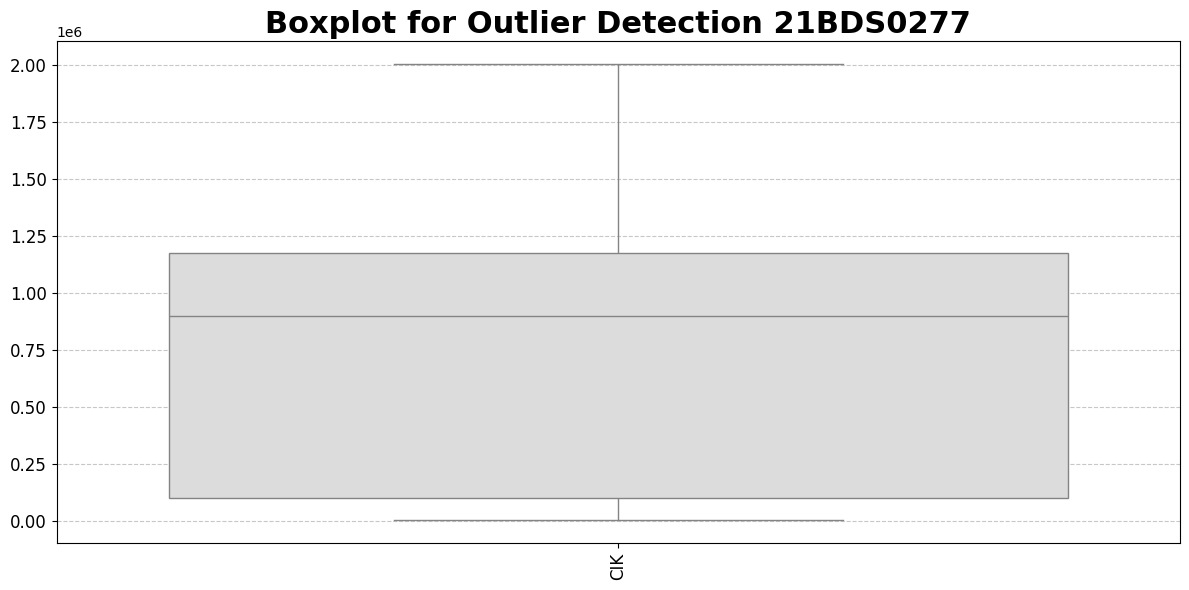

In [8]:
# Detect outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), palette='coolwarm')
plt.title('Boxplot for Outlier Detection 21BDS0277', fontsize=22, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Step 3: Univariate Analysis

### 3.1 Histogram

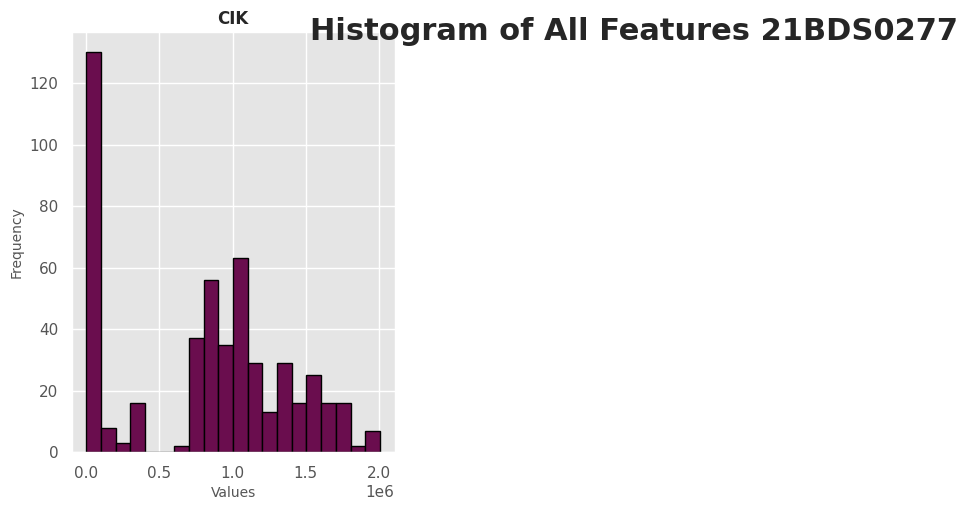

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set(style="whitegrid")
plt.style.use('ggplot')

color = '#6a0d4e'

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate number of rows needed based on the number of features
num_features = len(df_numeric.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each feature's histogram
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    df_numeric[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black', linewidth=1.0)
    ax.set_title(column, fontsize=12, weight='bold')
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Features 21BDS0277', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()


### 3.2 Density Plot

0    1902.0
1    1916.0
2    1888.0
3    2013.0
4    1989.0
Name: Founded, dtype: float64
float64


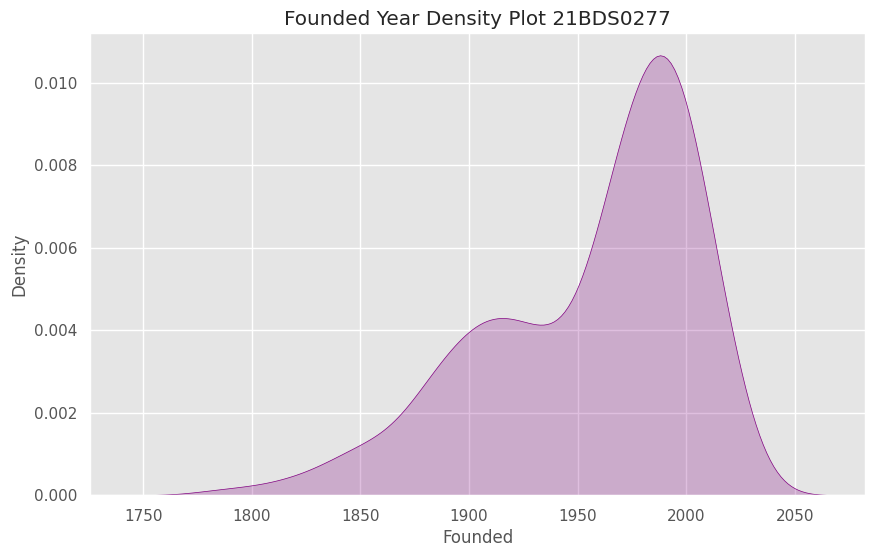

In [14]:
# Extract only the numeric part from 'Founded' column
df['Founded'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Check if it's now numeric
print(df['Founded'].head())
print(df['Founded'].dtypes)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Founded'], color='purple', fill=True)
plt.title("Founded Year Density Plot 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("Density")
plt.show()


### 3.3 Box Plot for Founded Column


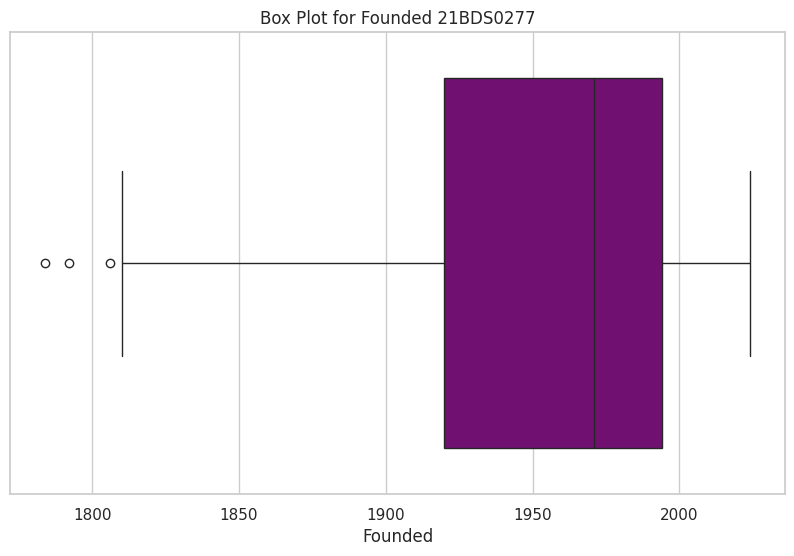

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Founded'], color='purple')
plt.title("Box Plot for Founded 21BDS0277")
plt.xlabel("Founded")
plt.show()


### 3.4 Bar Plot for GICS Sector

<ipython-input-18-4372b3def63e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GICS Sector', data=df, palette=colors, width=0.5)


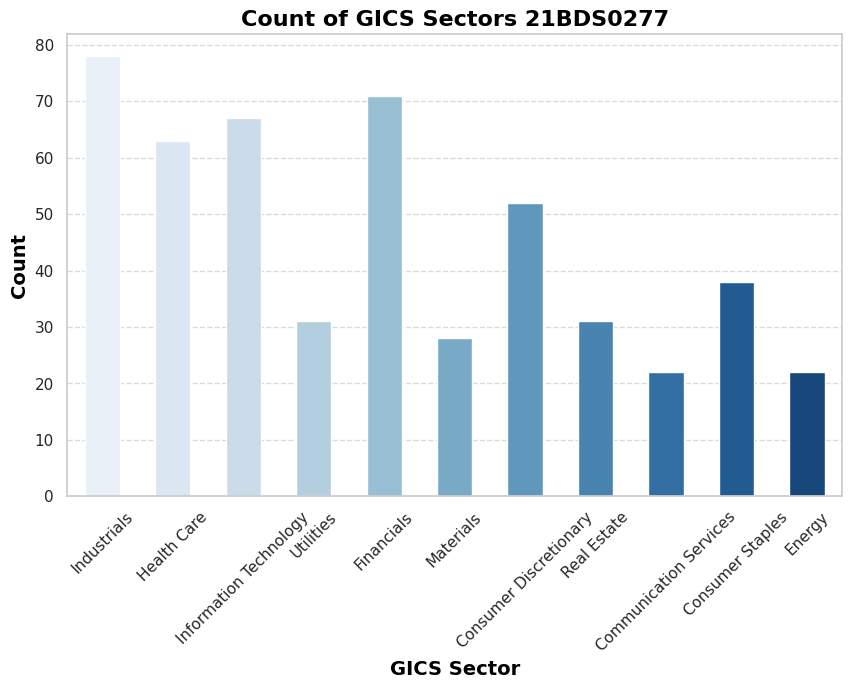

In [18]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

colors = sns.color_palette("Blues", n_colors=df['GICS Sector'].nunique())

sns.countplot(x='GICS Sector', data=df, palette=colors, width=0.5)

plt.title("Count of GICS Sectors 21BDS0277", fontsize=16, fontweight='bold', color='black')
plt.xlabel("GICS Sector", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Count", fontsize=14, color='black', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 3.5 Pie Plot for GICS Sector Distribution

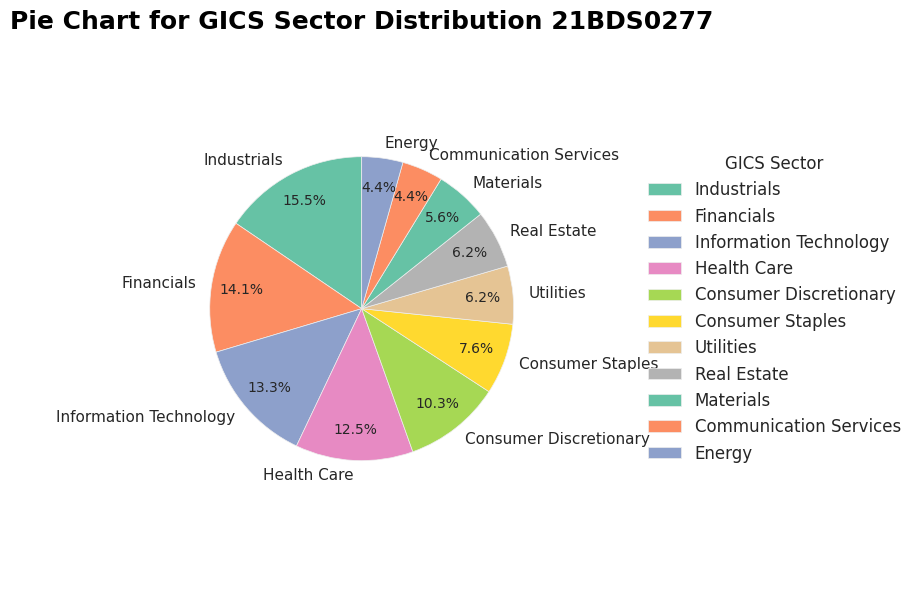

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create pie
wedges, texts, autotexts = ax.pie(
    sector_counts,
    labels=sector_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(sector_counts)],
    shadow=False,
    radius=0.7,
    pctdistance=0.8
)

#legend on the right
ax.legend(
    wedges,
    sector_counts.index,
    title="GICS Sector",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    frameon=False
)

# Title
plt.title("Pie Chart for GICS Sector Distribution 21BDS0277", fontsize=18, fontweight='bold', color='black')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


### 3.6 Dotplot for Founded Column

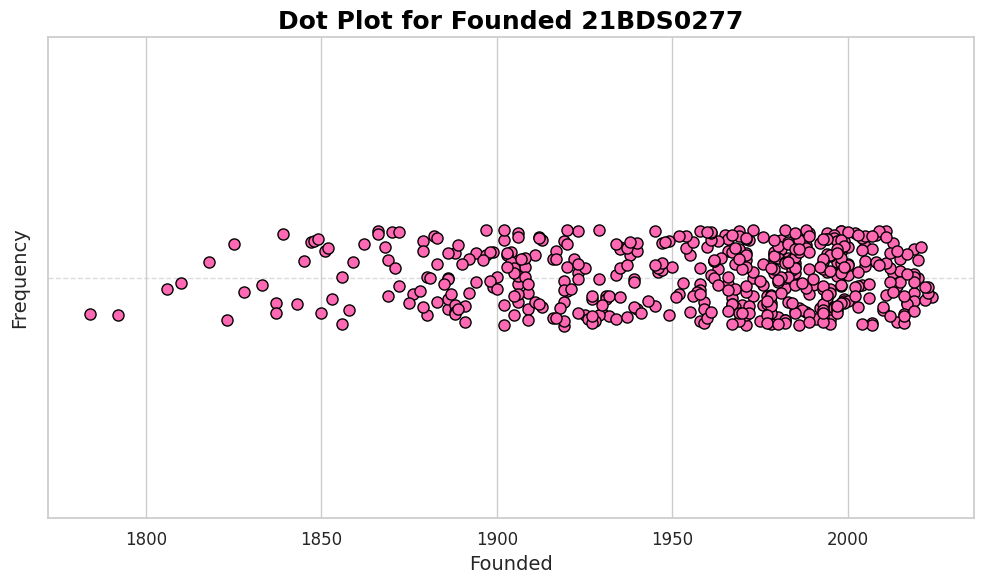

In [25]:
plt.figure(figsize=(10, 6))

sns.stripplot(x='Founded', data=df, color='#FF69B4', size=8, jitter=True, edgecolor='black', linewidth=1)

plt.title("Dot Plot for Founded 21BDS0277", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Founded", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 3.7 Boxplot for Numerical Features

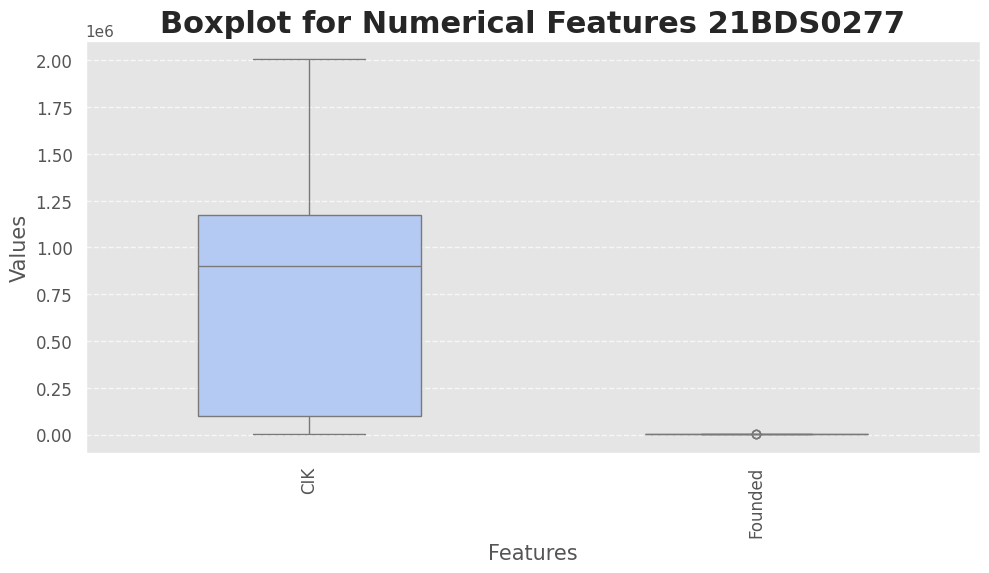

In [36]:
sns.set(style="whitegrid")
plt.style.use('ggplot')

df_numeric = df.select_dtypes(include=['float64', 'int64'])

palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

plt.title('Boxplot for Numerical Features 21BDS0277', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Step 4: Bivariate Analysis

### 4.1 Create a Contingency Table (GICS Sector vs Founded Binning)



In [38]:
# Cleaning 'Founded' if not already done
df['Founded'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Binning Founded into categories
bins = [1800, 1900, 1950, 2000, 2025]  # Adjust as needed
labels = ['Before 1900', '1900-1950', '1950-2000', 'After 2000']
df['founded_category'] = pd.cut(df['Founded'], bins=bins, labels=labels, include_lowest=True)

# Create a contingency table
contingency_table = pd.crosstab(df['GICS Sector'], df['founded_category'])
print(contingency_table)


founded_category        Before 1900  1900-1950  1950-2000  After 2000
GICS Sector                                                          
Communication Services            0          1         13           8
Consumer Discretionary            2         10         34           6
Consumer Staples                 15          9          6           8
Energy                            3          6          6           7
Financials                       21         13         33           2
Health Care                       7         10         40           6
Industrials                      13         28         28           9
Information Technology            1          5         51          10
Materials                         6         10          6           6
Real Estate                       1          1         25           4
Utilities                         6         13         11           1


## 4.2 Categorical vs Categorical Analysis

### 4.2.1 Stacked Bar Chart



<Figure size 1000x600 with 0 Axes>

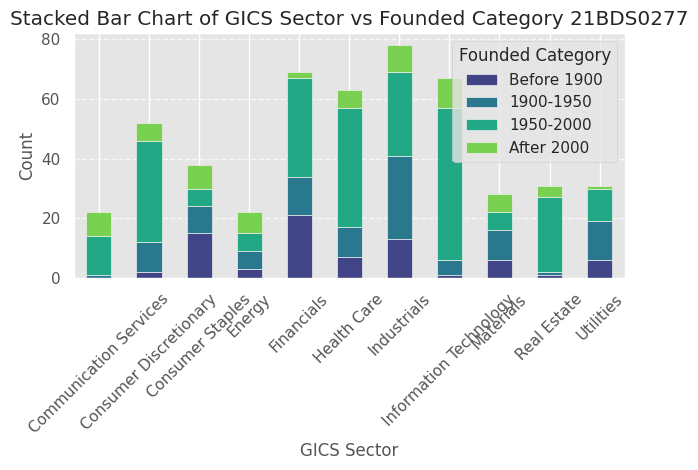

In [41]:
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", n_colors=len(contingency_table.columns)))
plt.title("Stacked Bar Chart of GICS Sector vs Founded Category 21BDS0277")
plt.xlabel("GICS Sector")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Founded Category')
plt.tight_layout()
plt.show()


### 4.2.2 Grouped Bar Plot

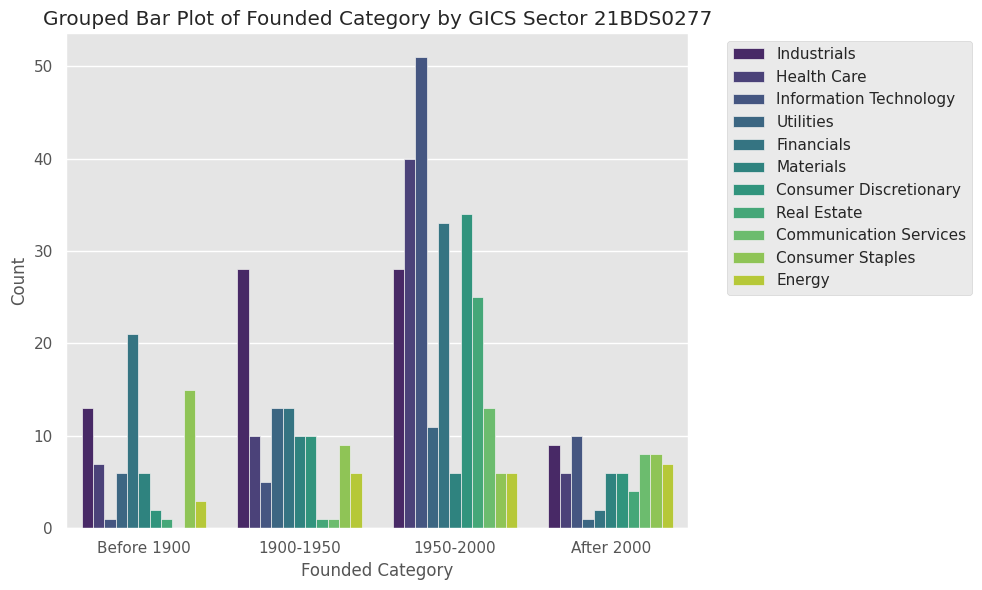

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='founded_category', hue='GICS Sector', palette="viridis")
plt.title("Grouped Bar Plot of Founded Category by GICS Sector 21BDS0277")
plt.xlabel("Founded Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4.3 Categorical vs Quantitative Analysis

### 4.3.1 Box Plot of Founded by GICS Sector



<ipython-input-46-e3bc6bc0a434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='GICS Sector', y='Founded', palette="coolwarm")


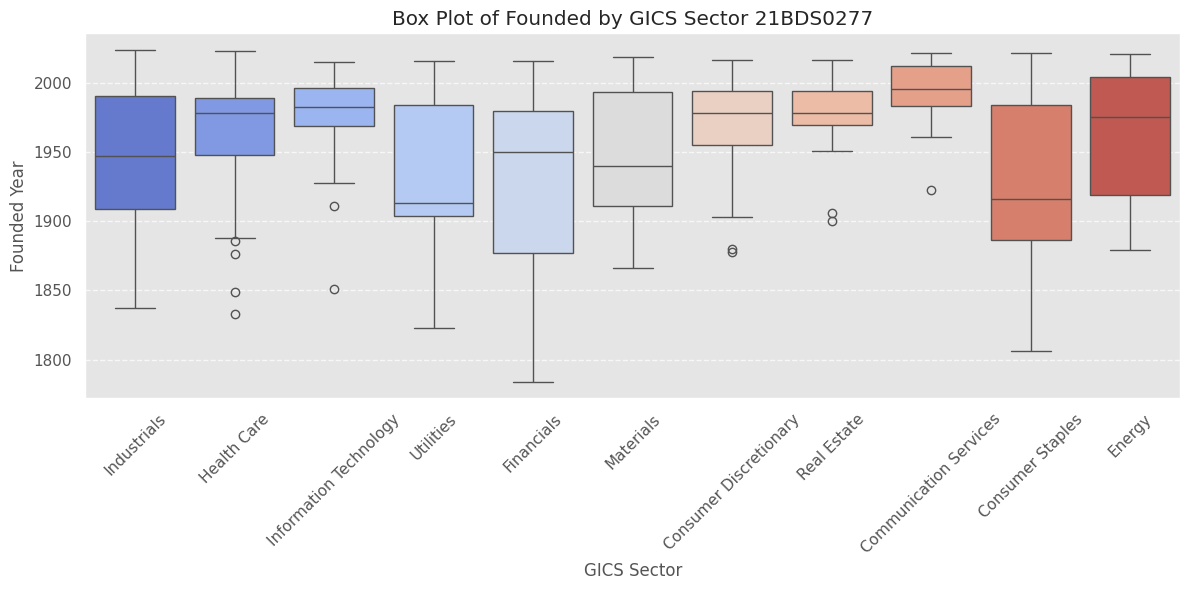

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='GICS Sector', y='Founded', palette="coolwarm")
plt.title("Box Plot of Founded by GICS Sector 21BDS0277")
plt.xlabel("GICS Sector")
plt.ylabel("Founded Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.4 Quantitative vs Quantitative Analysis

### 4.4.1 Scatter Plot (CIK vs Founded)

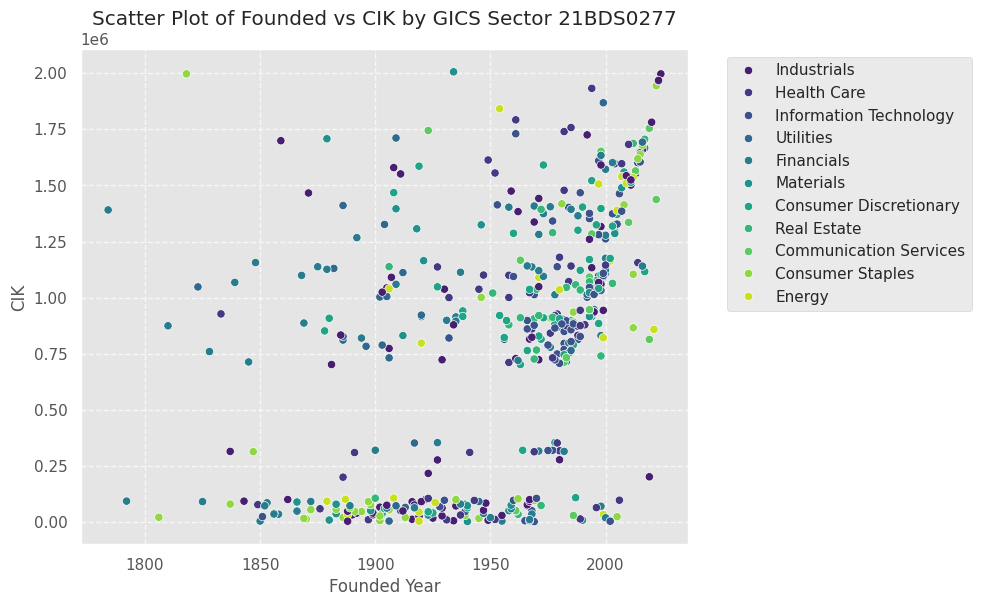

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', palette='viridis')
plt.title("Scatter Plot of Founded vs CIK by GICS Sector 21BDS0277")
plt.xlabel("Founded Year")
plt.ylabel("CIK")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4.4.2 Correlation Heatmap (Numerical Features Only)

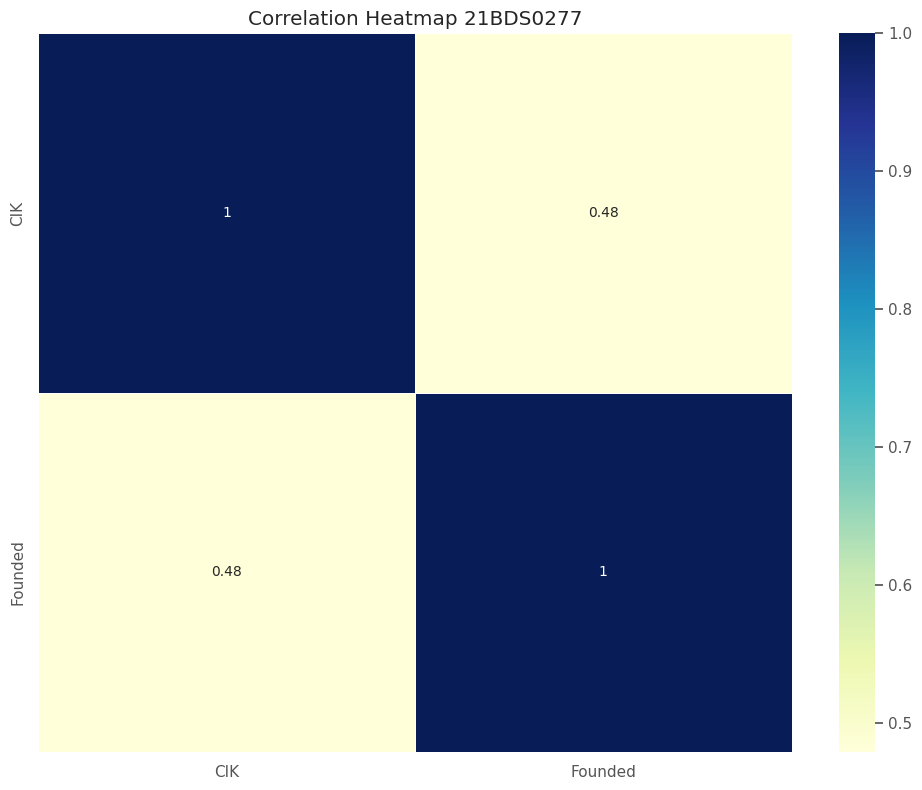

In [48]:
# Get only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap 21BDS0277")
plt.tight_layout()
plt.show()


# Step 5: Multivariate Analysis

### 5.1 Scatter Plot with Color as Third Variable

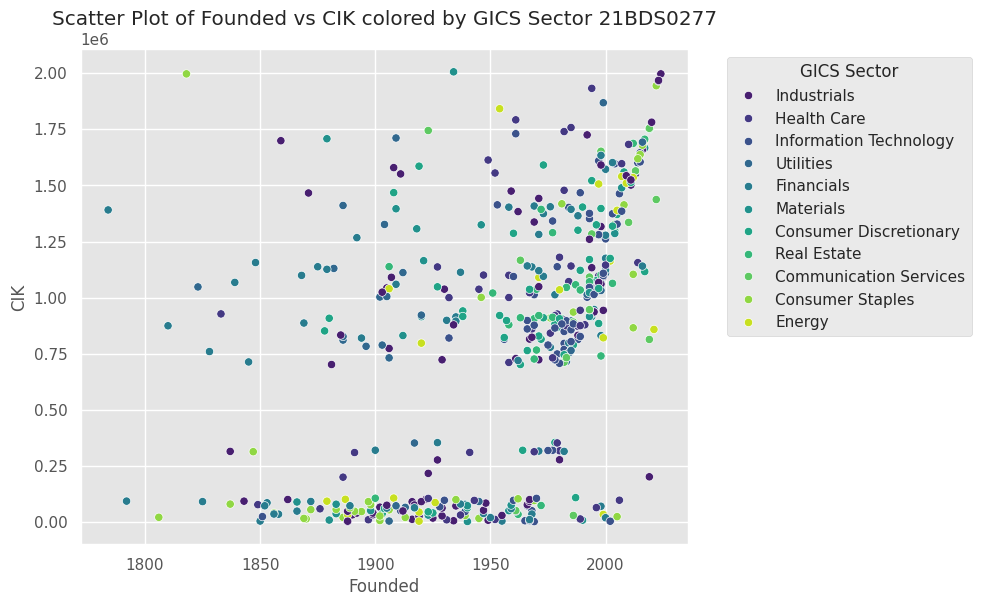

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', palette="viridis")
plt.title("Scatter Plot of Founded vs CIK colored by GICS Sector 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 5.2 Scatter Plot with Color and Shape

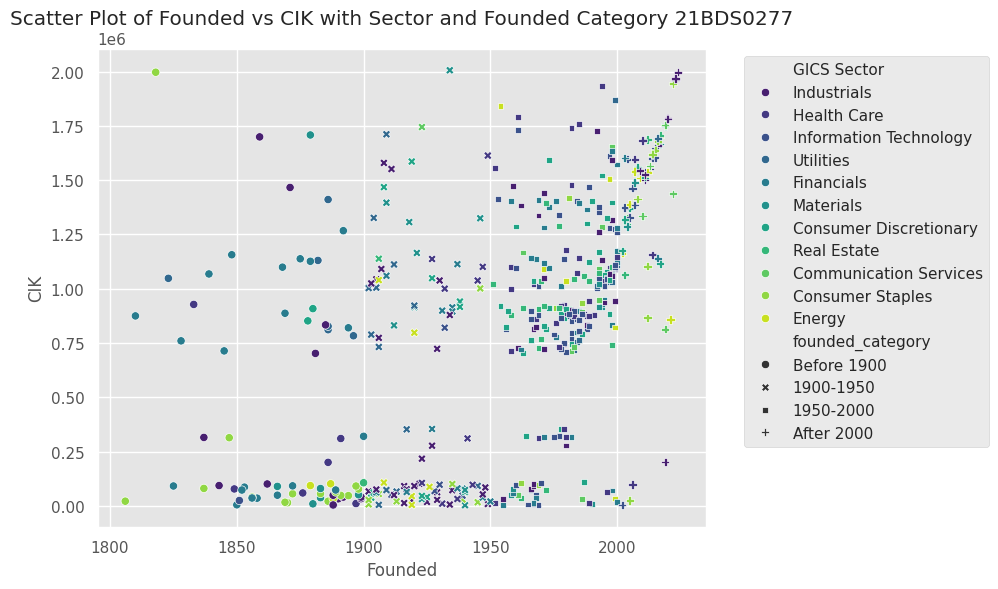

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', style='founded_category', palette="viridis")
plt.title("Scatter Plot of Founded vs CIK with Sector and Founded Category 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 5.3 Scatter Plot with Color and Size

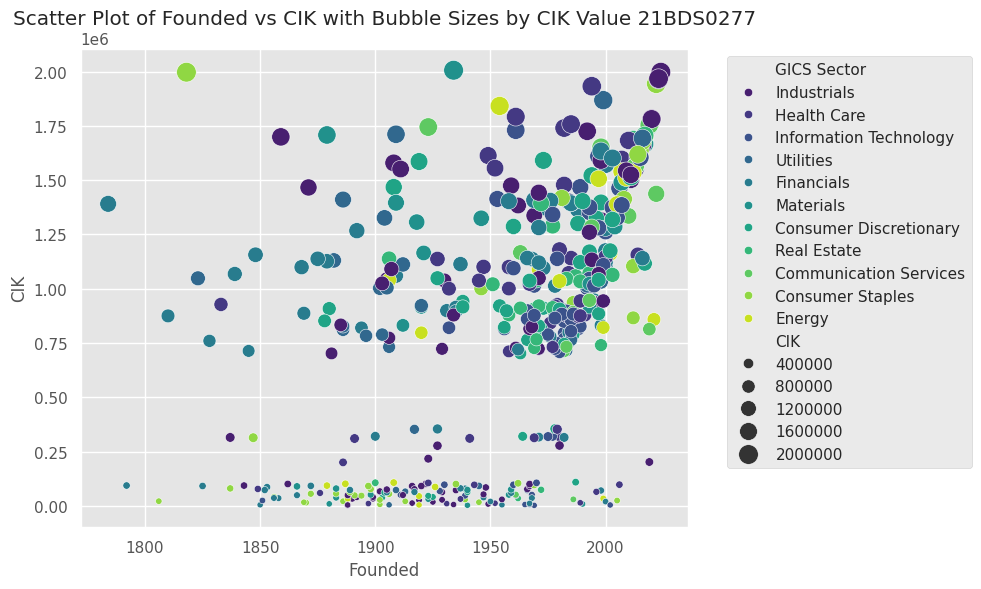

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', size='CIK', sizes=(20, 200), palette="viridis")
plt.title("Scatter Plot of Founded vs CIK with Bubble Sizes by CIK Value 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 5.4 Bubble Plot

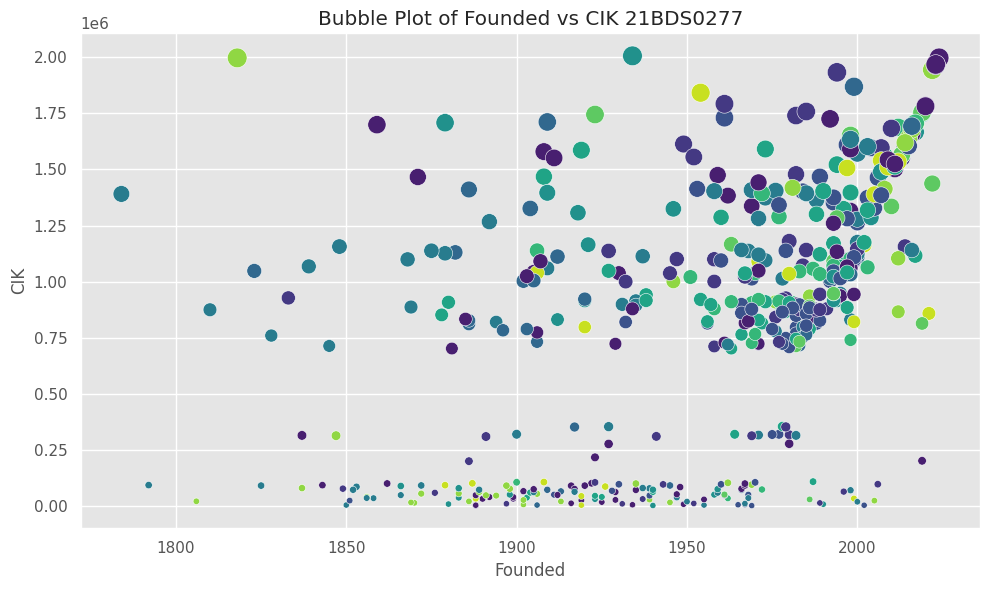

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', size='CIK', sizes=(20, 200), palette="viridis", legend=False)
plt.title("Bubble Plot of Founded vs CIK 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.tight_layout()
plt.show()


### 5.5 Faceted Histogram (GICS Sector wise)

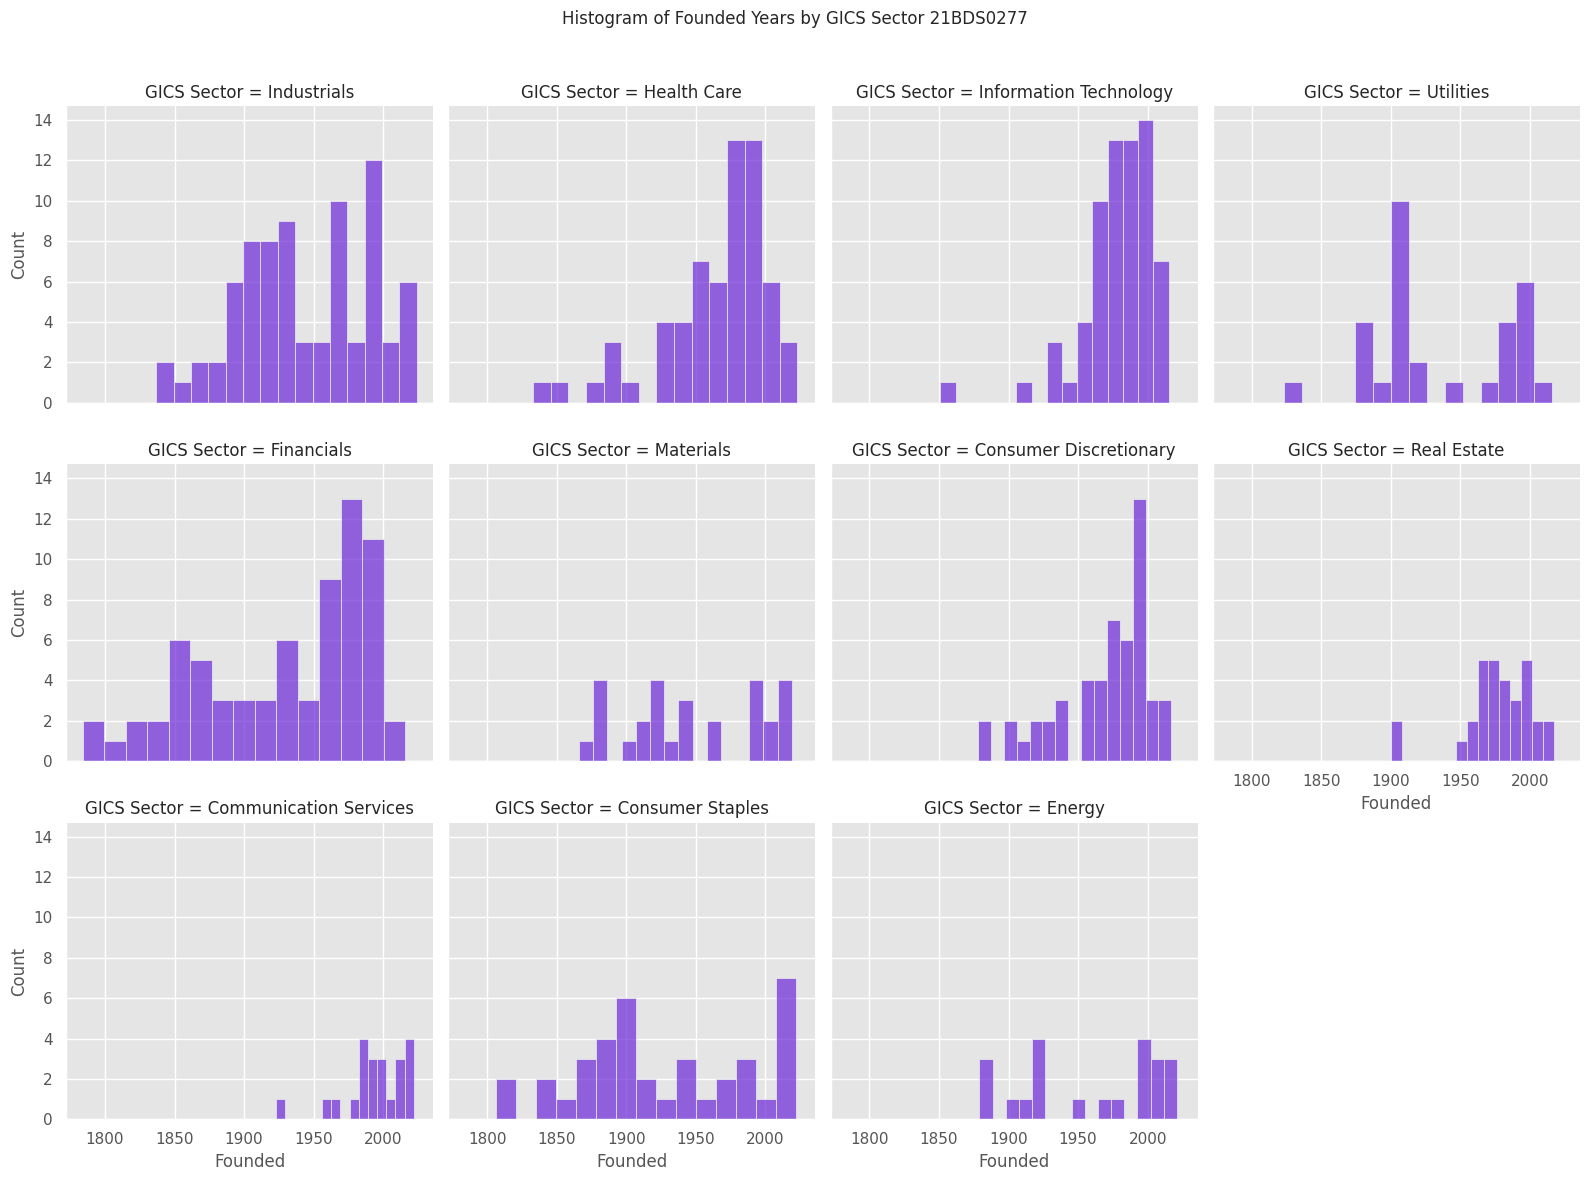

In [57]:
g = sns.FacetGrid(df, col='GICS Sector', col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, 'Founded', bins=15, color='#6D28D9', alpha=0.7)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Histogram of Founded Years by GICS Sector 21BDS0277")
plt.show()


### 5.6 Pairplot

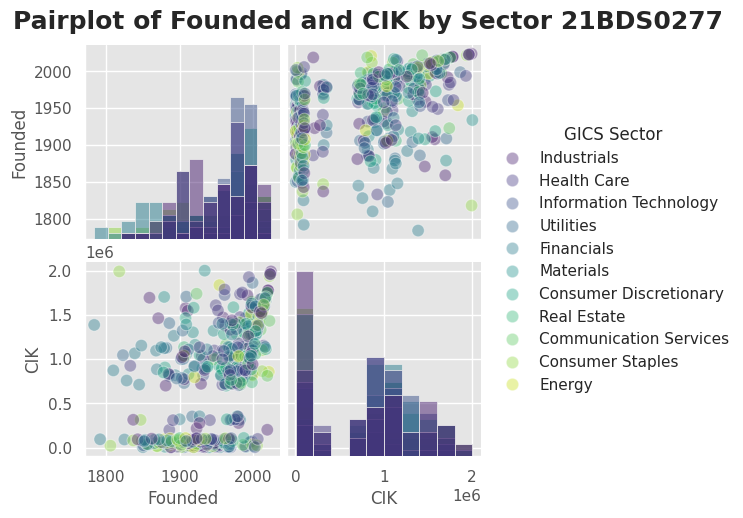

In [60]:
# Select relevant numeric features for the pairplot
features_of_interest = ['Founded', 'CIK']

pairplot = sns.pairplot(
    df[features_of_interest + ['GICS Sector']],
    hue='GICS Sector',
    palette="viridis",
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 'edgecolor': 'w', 's': 80}
)

pairplot.fig.suptitle('Pairplot of Founded and CIK by Sector 21BDS0277', fontsize=18, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)
plt.show()


# Module 2

### 6.1 Merging Data

In [61]:
# Creating a secondary dataframe to merge (based on GICS Sector)
df_merge = df[['Symbol', 'GICS Sector']]

# Merging the dataframe with itself to simulate merging process
df_merged = pd.merge(df, df_merge, on='Symbol')

# View merged dataframe
df_merged.head()


Symbol             Security           GICS Sector_x  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK  Founded founded_category           GICS Sector_y  
0    66740   1902.0        1900-1950             Industrials  
1    91142   1916.0        1900-1950             Industrials  
2     1800   1888.0      Before 1900             Health Care  
3  1551152   2013.0       After 2000             Health Care  
4  1467373   1989.0        1950-2000  Information Technology

### 6.2 Reshaping with Hierarchical Indexing

In [62]:
# Setting a hierarchical index based on 'GICS Sector' and 'Founded'
df.set_index(['GICS Sector', 'Founded'], inplace=True)

# View dataframe with hierarchical index
df.head()

# Resetting the index
df.reset_index(inplace=True)
df.head()


GICS Sector  Founded Symbol             Security  \
0             Industrials   1902.0    MMM                   3M   
1             Industrials   1916.0    AOS          A. O. Smith   
2             Health Care   1888.0    ABT  Abbott Laboratories   
3             Health Care   2013.0   ABBV               AbbVie   
4  Information Technology   1989.0    ACN            Accenture   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK founded_category  
0    66740        1900-1950  
1    91142        1900-1950  
2     1800      Before 1900  
3  1551152       After 2000  
4  1467373        1950-2000

### 6.3 Transformation Technique

In [63]:
# Applying log transformation to 'CIK' to reduce skewness
df['log_CIK'] = np.log(df['CIK'] + 1)  # Avoid log(0) by adding 1

# View transformed column
print(df[['CIK', 'log_CIK']].head())


       CIK    log_CIK
0    66740  11.108575
1    91142  11.420185
2     1800   7.496097
3  1551152  14.254509
4  1467373  14.198985


### 6.4 Discretization and Binning

In [64]:
# Discretizing the 'Founded' year into bins
bins = [1800, 1900, 1950, 2000, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', 'After 2000']

df['founded_bin'] = pd.cut(df['Founded'], bins=bins, labels=labels)

# View the binned column
df[['Founded', 'founded_bin']].head()


Founded  founded_bin
0   1902.0    1900-1950
1   1916.0    1900-1950
2   1888.0  Before 1900
3   2013.0   After 2000
4   1989.0    1950-2000

# Module 3

### 7.1 Skip Time-Series (No Time Column in Dataset)
Since your dataset is not a time-series dataset, the time simulation will be purely for illustration.



### 7.2 Create a Simulated Time Index

In [65]:
# Simulate a time index
df['time'] = pd.Series(range(len(df)))

# View the updated dataframe
df.head()


GICS Sector  Founded Symbol             Security  \
0             Industrials   1902.0    MMM                   3M   
1             Industrials   1916.0    AOS          A. O. Smith   
2             Health Care   1888.0    ABT  Abbott Laboratories   
3             Health Care   2013.0   ABBV               AbbVie   
4  Information Technology   1989.0    ACN            Accenture   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK founded_category    log_CIK  founded_bin  time  
0    66740        1900-1950  11.108575    1900-1950     0  
1    91142        1900-1950  11.420185    1900-1950     1  
2     1800      Before 1900   7.496097  Before 1900     2  
3  1551152       After 2000  14.254509   After 2000     3  
4  1467373        1950-2000  14.198985    1950-2000     4

### 7.3 Check for Missing Values

In [66]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 GICS Sector              0
Founded                  0
Symbol                   0
Security                 0
GICS Sub-Industry        0
Headquarters Location    0
Date added               0
CIK                      0
founded_category         2
log_CIK                  0
founded_bin              2
time                     0
dtype: int64


### 7.4 Plot the Time Series of CIK

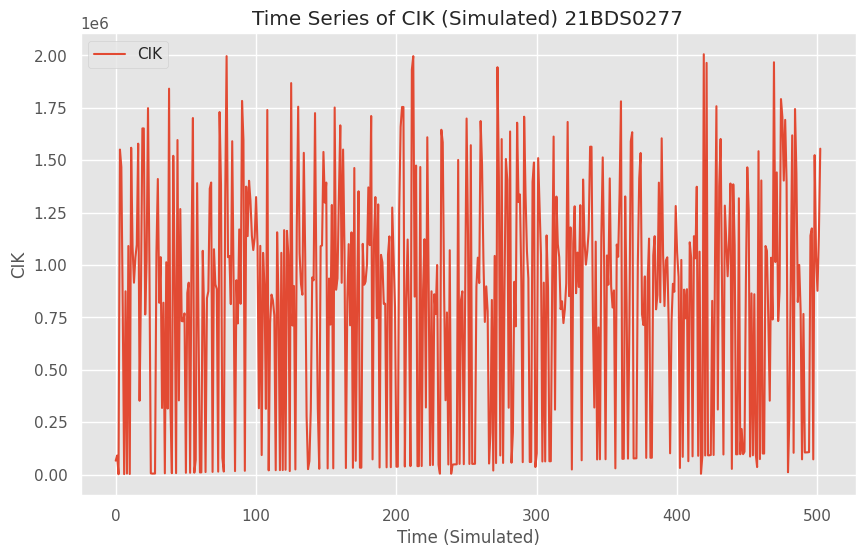

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['CIK'], label='CIK')
plt.title("Time Series of CIK (Simulated) 21BDS0277")
plt.xlabel("Time (Simulated)")
plt.ylabel("CIK")
plt.legend()
plt.show()


7.5 Decompose CIK with Rolling Mean

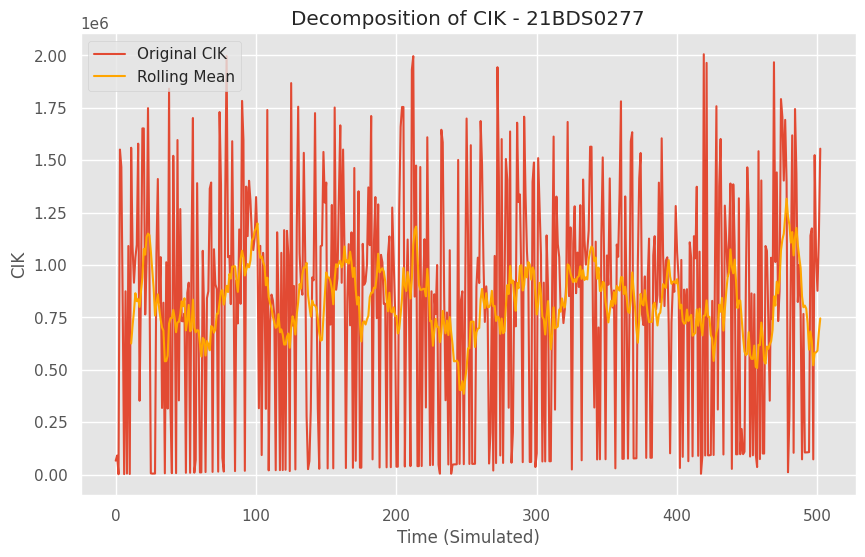

In [147]:
# Step 1: Create a dummy 'time' column
df['time'] = range(len(df))

# Step 2: Calculate rolling mean
df['rolling_mean'] = df['CIK'].rolling(window=12).mean()

# Step 3: Plot original and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['CIK'], label='Original CIK')
plt.plot(df['time'], df['rolling_mean'], label='Rolling Mean', color='orange')
plt.title("Decomposition of CIK - 21BDS0277")
plt.xlabel("Time (Simulated)")
plt.ylabel("CIK")
plt.legend()
plt.grid(True)
plt.show()


### 7.6 Box Plot Across Categories (Founded Bin)

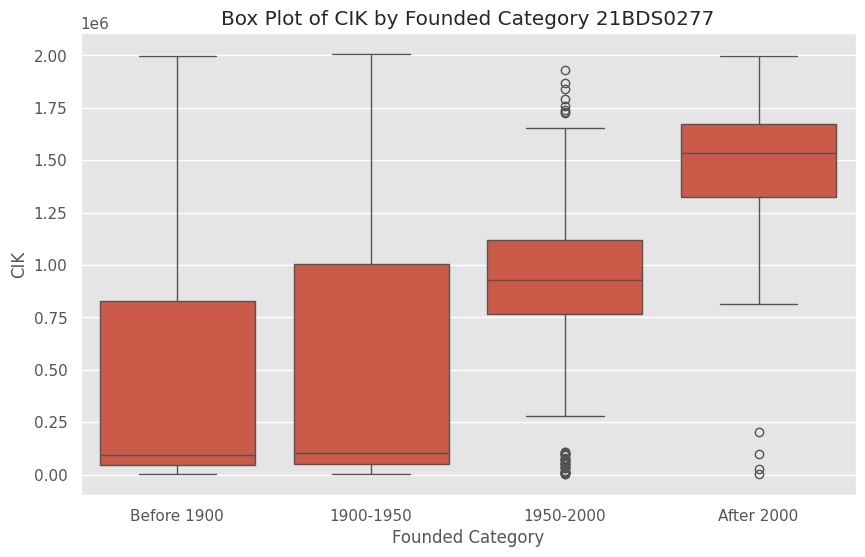

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='founded_bin', y='CIK', data=df)
plt.title("Box Plot of CIK by Founded Category 21BDS0277")
plt.xlabel("Founded Category")
plt.ylabel("CIK")
plt.show()


# Module 4

## 8. 1D Statistical Data Analysis

### 8.1 Measures of Central Tendency

In [71]:
# Calculate Mean
mean_values = df[['CIK', 'Founded']].mean()
print("Mean Values:\n", mean_values)

# Calculate Median
median_values = df[['CIK', 'Founded']].median()
print("\nMedian Values:\n", median_values)

# Calculate Quantiles
quantiles = df[['CIK', 'Founded']].quantile([0.25, 0.5, 0.75])
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)


Mean Values:
 CIK        821753.648111
Founded      1955.737575
dtype: float64

Median Values:
 CIK        900075.0
Founded      1971.0
dtype: float64

Quantiles (25%, 50%, 75%):
             CIK  Founded
0.25   100505.0   1920.0
0.50   900075.0   1971.0
0.75  1175188.0   1994.0


### 8.2 Measures of Dispersion

In [72]:
import scipy.stats as stats

columns = ['CIK', 'Founded']

# Range
range_values = df[columns].max() - df[columns].min()
print("\nRange Values:\n", range_values)

# IQR
iqr_values = stats.iqr(df[columns], axis=0)
print("\nInterquartile Range (IQR):\n", iqr_values)

# Standard Deviation
std_dev = df[columns].std()
print("\nStandard Deviation:\n", std_dev)

# Skewness
skewness = df[columns].skew()
print("\nSkewness:\n", skewness)

# Kurtosis
kurtosis = df[columns].kurt()
print("\nKurtosis:\n", kurtosis)



Range Values:
 CIK        2004151.0
Founded        240.0
dtype: float64

Interquartile Range (IQR):
 [1.074683e+06 7.400000e+01]

Standard Deviation:
 CIK        566520.030139
Founded        48.748713
dtype: float64

Skewness:
 CIK       -0.093017
Founded   -0.912719
dtype: float64

Kurtosis:
 CIK       -1.108123
Founded    0.165166
dtype: float64


### 8.3 Frequency Distribution

### 8.3.1 Histogram

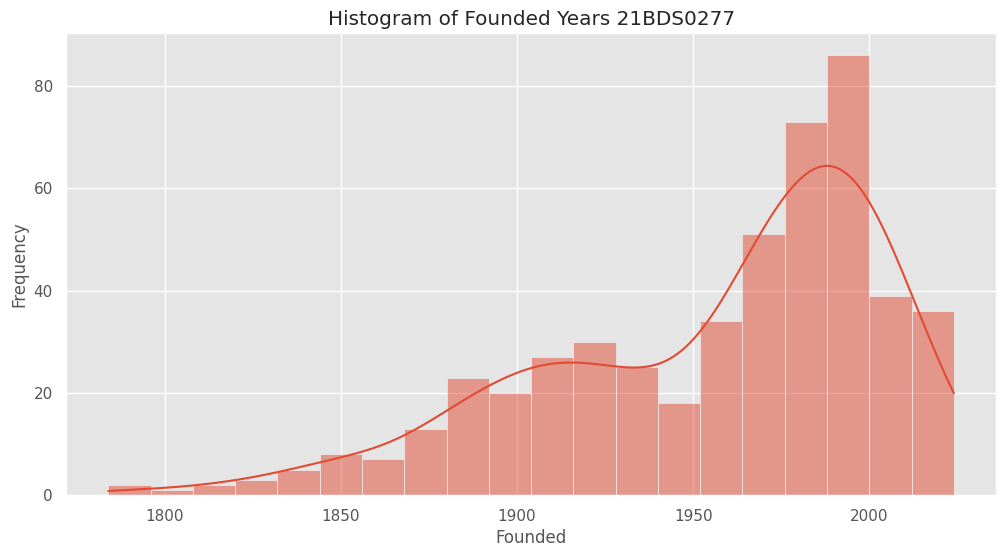

In [145]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Founded'].dropna(), bins=20, kde=True)
plt.title("Histogram of Founded Years 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("Frequency")
plt.show()


### 8.3.2 Cumulative Frequency Distribution

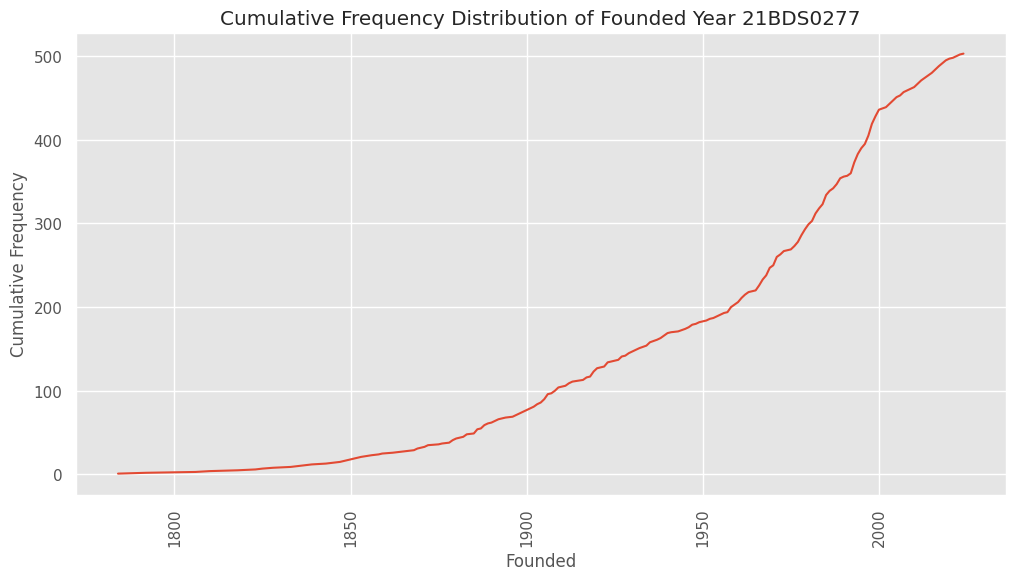

In [142]:
cumulative_freq = df['Founded'].value_counts().sort_index().cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_freq.index, y=cumulative_freq.values)
plt.title("Cumulative Frequency Distribution of Founded Year 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("Cumulative Frequency")
plt.xticks(rotation=90)
plt.show()


## 8.4 Categorical Variable Analysis

### 8.4.1 Pie Plot for GICS Sector

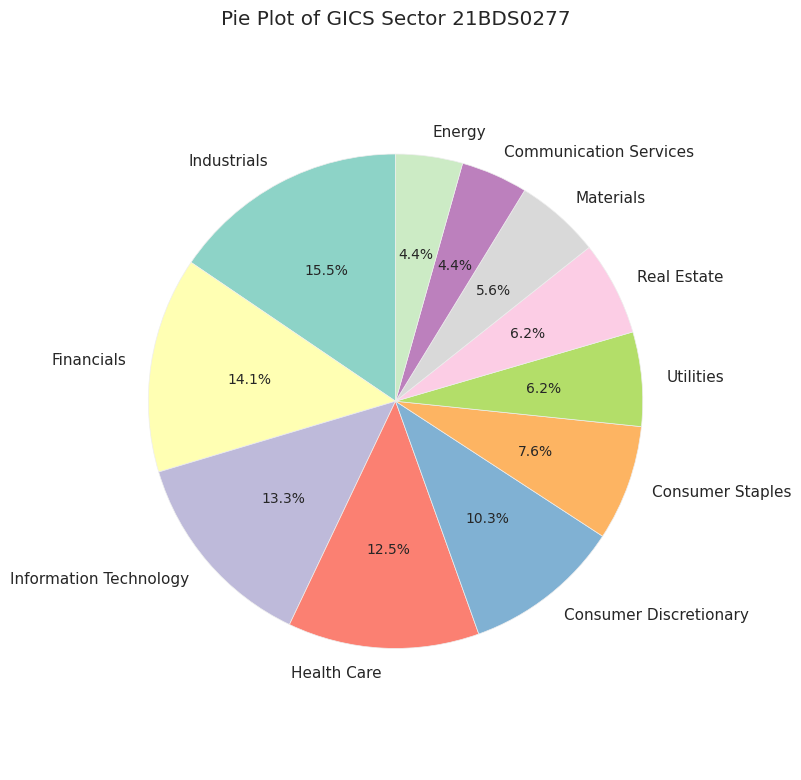

In [143]:
sector_counts = df['GICS Sector'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3", n_colors=len(sector_counts))

plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Pie Plot of GICS Sector 21BDS0277")
plt.axis('equal')
plt.tight_layout()
plt.show()


### 8.4.2 Stacked Bar Plot of founded_bin by GICS Sector

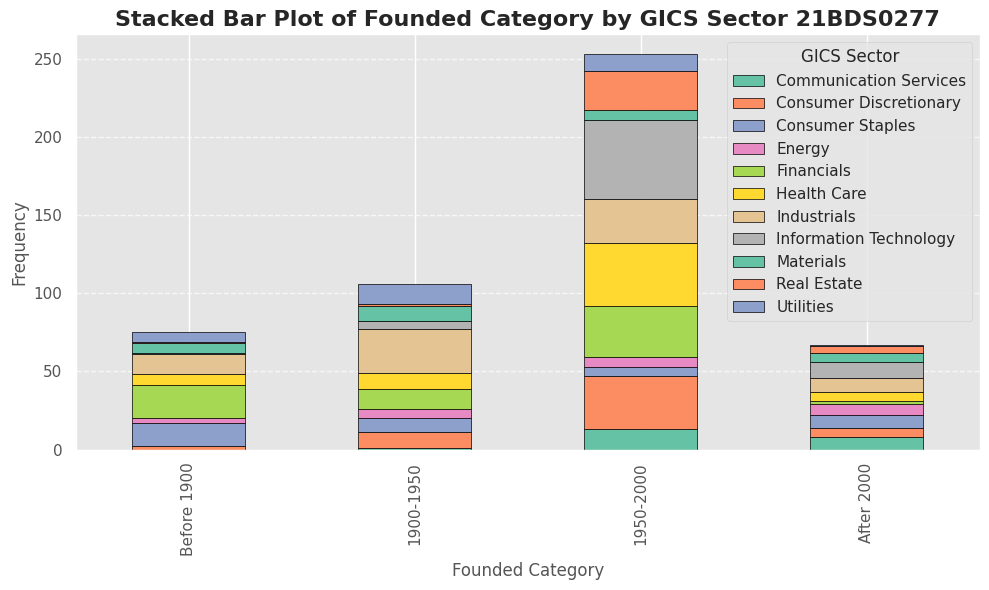

In [144]:
# Step 1: Convert Founded to string first (safe)
df['Founded'] = df['Founded'].astype(str)

# Step 2: Extract the year from strings like '1982 (1919)' or clean numbers
df['Founded'] = df['Founded'].str.extract('(\d{4})')

# Step 3: Convert it into numeric
df['Founded'] = pd.to_numeric(df['Founded'])

# Step 4: Bin the Founded column
bins = [1800, 1900, 1950, 2000, 2025]
labels = ['Before 1900', '1900-1950', '1950-2000', 'After 2000']
df['founded_bin'] = pd.cut(df['Founded'], bins=bins, labels=labels)

# Step 5: Create the pivot table
pivot_table = df.groupby(['founded_bin', 'GICS Sector'], observed=True).size().unstack()

# Step 6: Plot the stacked bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", n_colors=len(pivot_table.columns))

pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=plt.gca())

plt.title("Stacked Bar Plot of Founded Category by GICS Sector 21BDS0277", fontsize=16, fontweight='bold')
plt.xlabel("Founded Category")
plt.ylabel("Frequency")
plt.legend(title='GICS Sector', loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 9. Exploratory Data Analysis for Structured data - 2D Analysis

### 9.1 Two-Way Contingency Tables

In [78]:
# Categorical-Categorical: GICS Sector vs Founded Bin
cat_cat_table = pd.crosstab(df['GICS Sector'], df['founded_bin'])
print("Categorical-Categorical Contingency Table:\n", cat_cat_table)

# Numerical-Numerical: Binned Founded vs Binned CIK
num_num_table = pd.crosstab(pd.cut(df['Founded'], bins=3), pd.cut(df['CIK'], bins=3))
print("\nNumerical-Numerical Contingency Table:\n", num_num_table)

# Categorical-Numerical: GICS Sector vs Binned CIK
cat_num_table = pd.crosstab(df['GICS Sector'], pd.cut(df['CIK'], bins=3))
print("\nCategorical-Numerical Contingency Table:\n", cat_num_table)


Categorical-Categorical Contingency Table:
 founded_bin             Before 1900  1900-1950  1950-2000  After 2000
GICS Sector                                                          
Communication Services            0          1         13           8
Consumer Discretionary            2         10         34           6
Consumer Staples                 15          9          6           8
Energy                            3          6          6           7
Financials                       21         13         33           2
Health Care                       7         10         40           6
Industrials                      13         28         28           9
Information Technology            1          5         51          10
Materials                         6         10          6           6
Real Estate                       1          1         25           4
Utilities                         6         13         11           1

Numerical-Numerical Contingency Table:
 CIK  

### 9.2 Create a 3-Way Contingency Table

In [79]:
# 3-Way Contingency: GICS Sector x Founded Bin x Binned CIK
three_way_table = pd.crosstab([df['GICS Sector'], df['founded_bin']], pd.cut(df['CIK'], bins=3))
print("\n3-Way Contingency Table:\n", three_way_table)



3-Way Contingency Table:
 CIK                                 (-204.151, 669850.333]  \
GICS Sector            founded_bin                           
Communication Services 1900-1950                         0   
                       1950-2000                         2   
                       After 2000                        0   
Consumer Discretionary Before 1900                       0   
                       1900-1950                         5   
                       1950-2000                         3   
                       After 2000                        0   
Consumer Staples       Before 1900                      14   
                       1900-1950                         8   
                       1950-2000                         2   
                       After 2000                        1   
Energy                 Before 1900                       3   
                       1900-1950                         4   
                       1950-2000           

### 9.3 Row Profile, Column Profile, Relative Frequency, Chi-Square Test

In [80]:
import scipy.stats as stats

# Row Profile
row_profile = three_way_table.div(three_way_table.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column Profile
col_profile = three_way_table.div(three_way_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Relative Frequency
relative_frequency = three_way_table / three_way_table.sum().sum()
print("\nRelative Frequency:\n", relative_frequency)

# Chi-Square Test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(three_way_table)
print(f"\nChi-Square Test:\nChi2 Statistic = {chi2_stat}, p-value = {p_val}")



Row Profile:
 CIK                                 (-204.151, 669850.333]  \
GICS Sector            founded_bin                           
Communication Services 1900-1950                  0.000000   
                       1950-2000                  0.153846   
                       After 2000                 0.000000   
Consumer Discretionary Before 1900                0.000000   
                       1900-1950                  0.500000   
                       1950-2000                  0.088235   
                       After 2000                 0.000000   
Consumer Staples       Before 1900                0.933333   
                       1900-1950                  0.888889   
                       1950-2000                  0.333333   
                       After 2000                 0.125000   
Energy                 Before 1900                1.000000   
                       1900-1950                  0.666667   
                       1950-2000                  0.166

### 9.4 Scatter Plot for Founded vs CIK

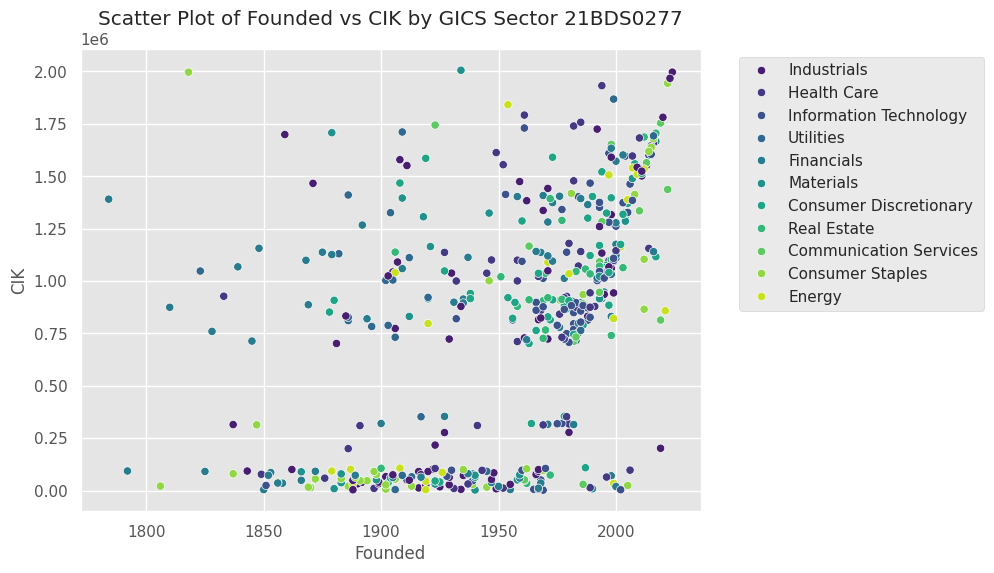

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Founded', y='CIK', hue='GICS Sector', palette='viridis')
plt.title("Scatter Plot of Founded vs CIK by GICS Sector 21BDS0277")
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 9.5 3D Scatter Plot

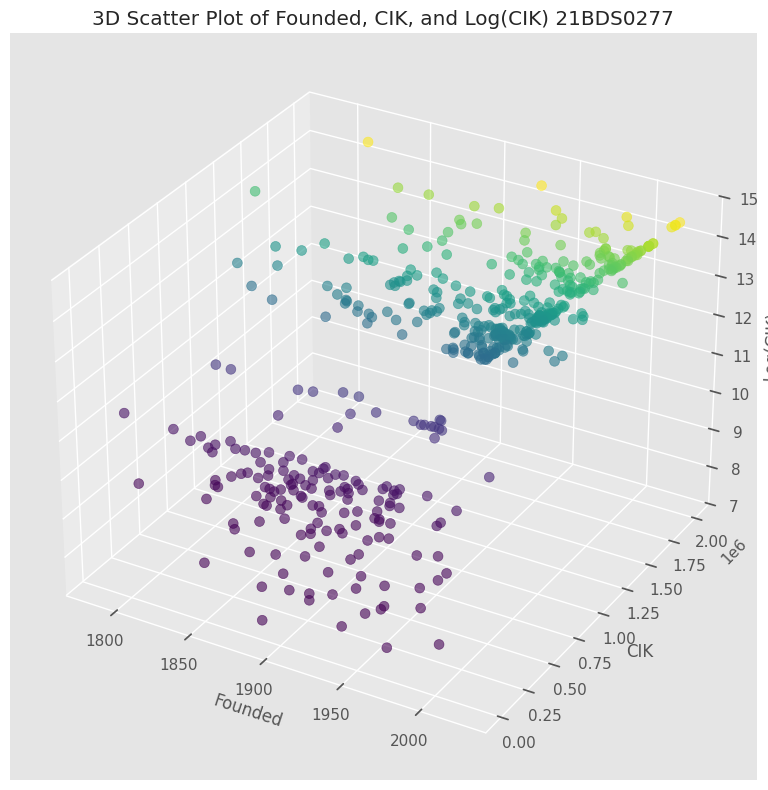

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Founded'], df['CIK'], df['log_CIK'], c=df['CIK'], cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Founded')
ax.set_ylabel('CIK')
ax.set_zlabel('Log(CIK)')
ax.set_title('3D Scatter Plot of Founded, CIK, and Log(CIK) 21BDS0277')

plt.tight_layout()
plt.show()


### 9.6 2D Box Plot

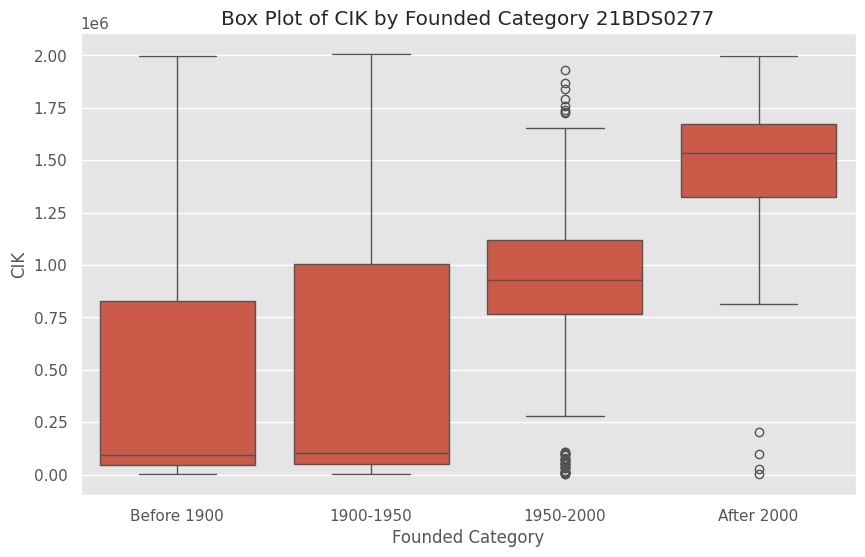

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='founded_bin', y='CIK', data=df)
plt.title("Box Plot of CIK by Founded Category 21BDS0277")
plt.xlabel("Founded Category")
plt.ylabel("CIK")
plt.show()


# Module 5

## 10. K-Means Clustering
10.1 Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


### 10.2 Using the Elbow Method

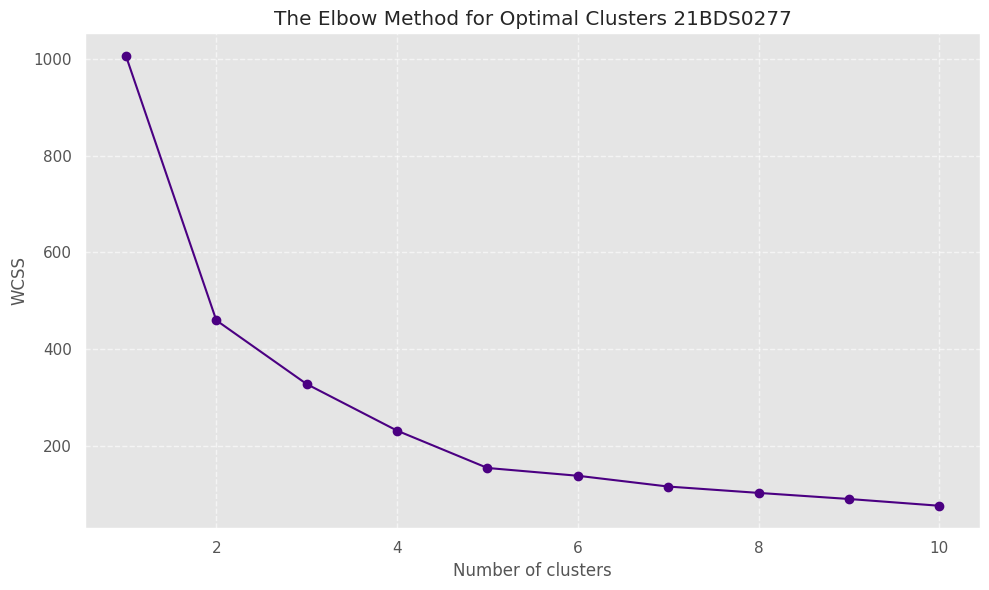

In [136]:
# Use relevant numerical features
X = df[['CIK', 'Founded']].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='indigo')
plt.title('The Elbow Method for Optimal Clusters 21BDS0277')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 10.3 Fit K-Means Clustering

Silhouette Score: 0.49298702077943723


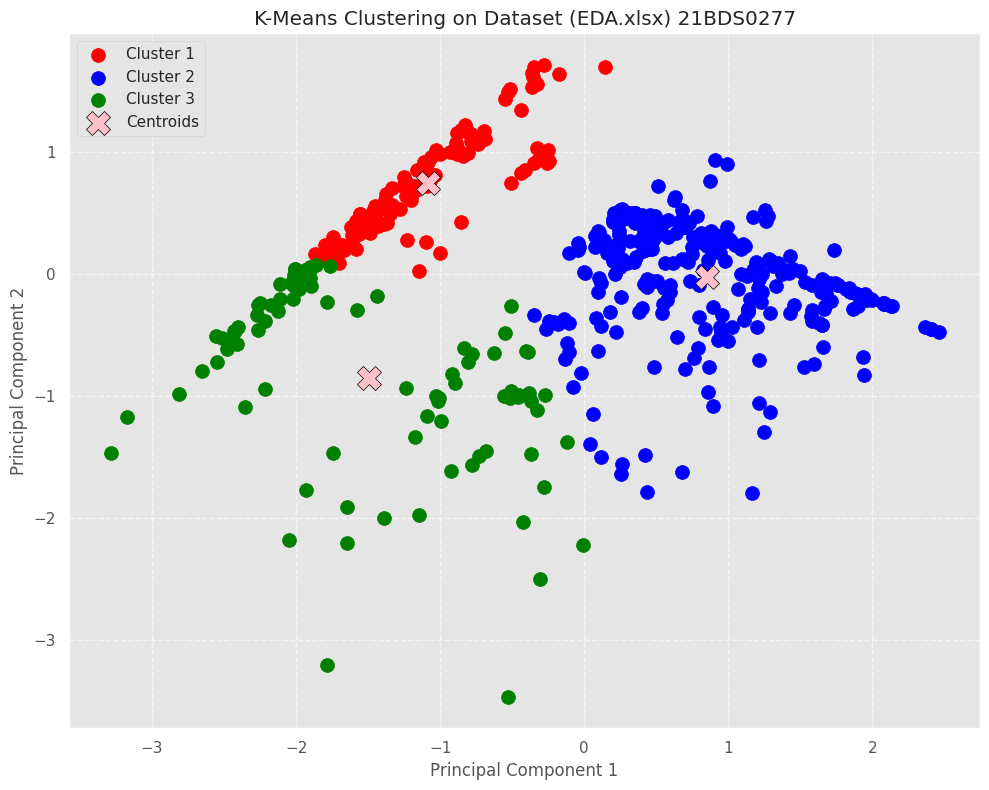

In [91]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score}")

# Visualizing the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink', label='Centroids', marker='X', edgecolors='black')

plt.title('K-Means Clustering on Dataset (EDA.xlsx) 21BDS0277')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 10.4 Distance Calculation

In [92]:
# Euclidean Distance
euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')

# Manhattan Distance
manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, 'cityblock')

# Cosine Distance
cosine_distances = cdist(X_pca, kmeans.cluster_centers_, 'cosine')

# Print first 5 distances
print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])


Euclidean Distances (first 5 points):
 [[0.86250113 2.58079373 1.04203217]
 [0.57424804 2.36804657 1.1892481 ]
 [1.15918621 2.85896665 1.03143798]
 [2.94859559 0.89409008 3.32797669]
 [2.60698146 0.52979971 2.83364545]]
Manhattan Distances (first 5 points):
 [[1.21861659 2.76451708 1.24591449]
 [0.81206842 2.70354131 1.19354192]
 [1.62516477 2.92678929 1.4081867 ]
 [3.65643144 0.94473474 4.01034   ]
 [3.44708429 0.7353876  3.31340027]]
Cosine Distances (first 5 points):
 [[1.25675357e-01 1.99809468e+00 1.82236290e-01]
 [7.10962527e-02 1.98216646e+00 2.61990459e-01]
 [1.63922871e-01 1.99992547e+00 1.41948185e-01]
 [1.84975425e+00 8.73376176e-05 1.84471817e+00]
 [1.93758757e+00 2.26675105e-02 1.72147524e+00]]


## 11. Hierarchical Clustering
11.1 Import Libraries and Load Dataset

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram


### 11.2 Prepare Dataset

In [94]:
# Select numeric columns for clustering
dataset = df[['CIK', 'Founded']].dropna()


### 11.3 Euclidean Distance Dendrogram

Sample of Euclidean Distances:
 [  24402.00401606   64940.00150909 1484412.00415013 1400633.00270199
  729603.00438595   64252.03493276  808021.0038619    61763.02274015
 1024132.00459365   63771.01132176]


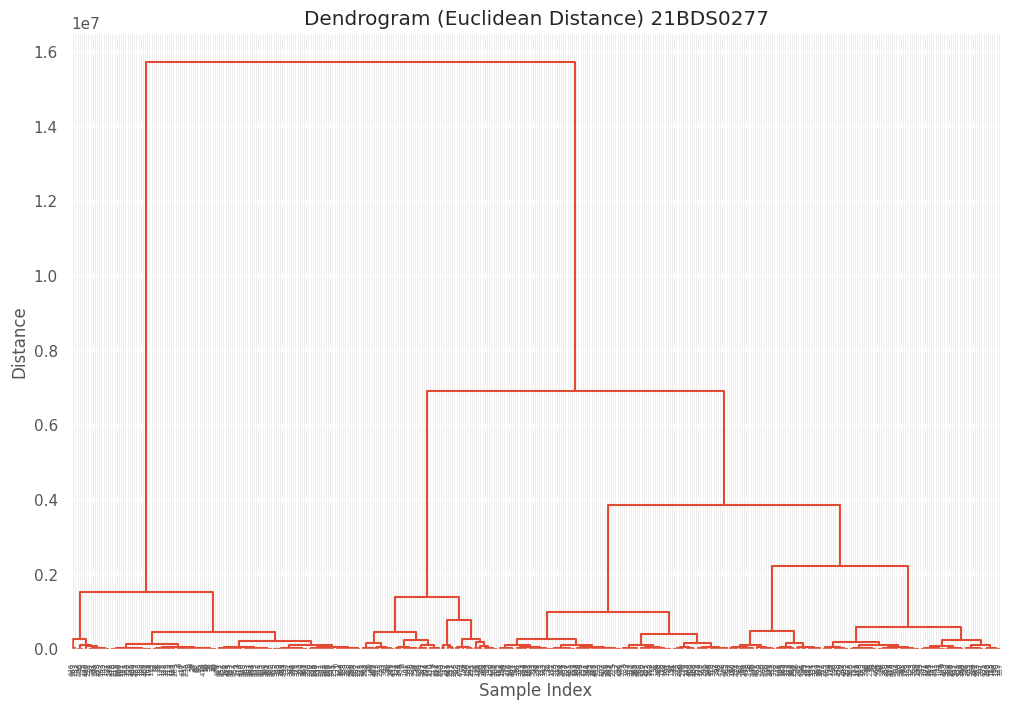

In [135]:
euclidean_distances = pdist(dataset, metric='euclidean')
print("Sample of Euclidean Distances:\n", euclidean_distances[:10])

linked = linkage(euclidean_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Euclidean Distance) 21BDS0277')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked, color_threshold=0)
plt.show()


### 11.4 Manhattan Distance Dendrogram

Sample of Manhattan Distances:
 [  24416.   64954. 1484523. 1400720.  729683.   64319.  808100.   61816.
 1024229.   63809.]


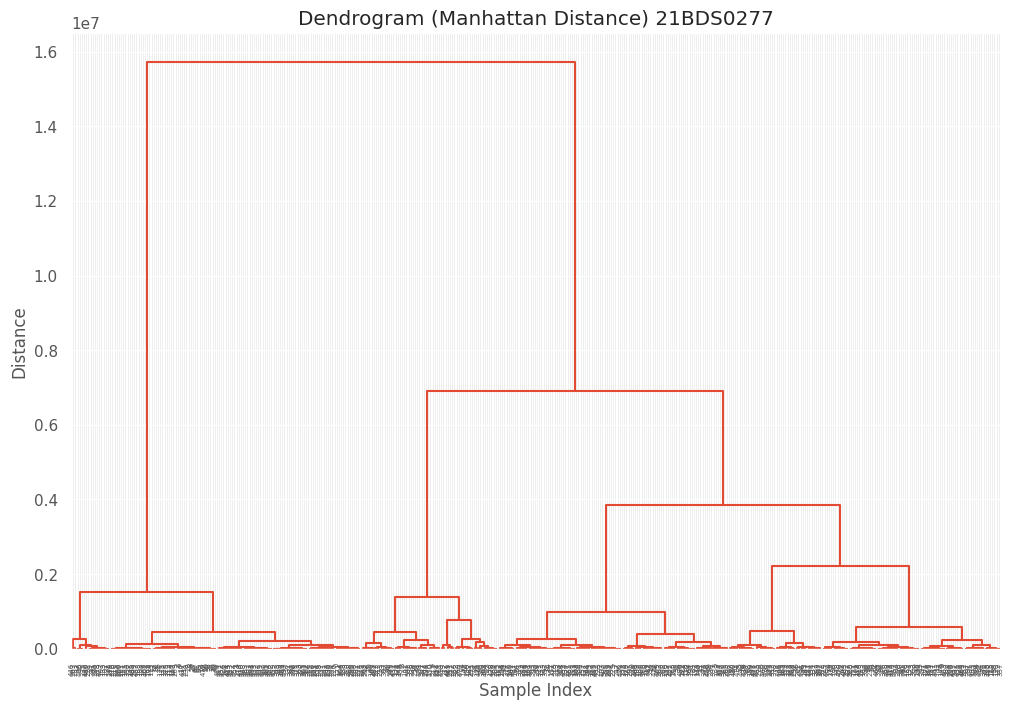

In [134]:
manhattan_distances = pdist(dataset, metric='cityblock')
print("Sample of Manhattan Distances:\n", manhattan_distances[:10])

linked_manhattan = linkage(manhattan_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Manhattan Distance) 21BDS0277')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked_manhattan, color_threshold=0)
plt.show()


### 11.5 Maximum (Chebyshev) Distance Dendrogram


Sample of Chebyshev Distances:
 [  24402.   64940. 1484412. 1400633.  729603.   64252.  808021.   61763.
 1024132.   63771.]


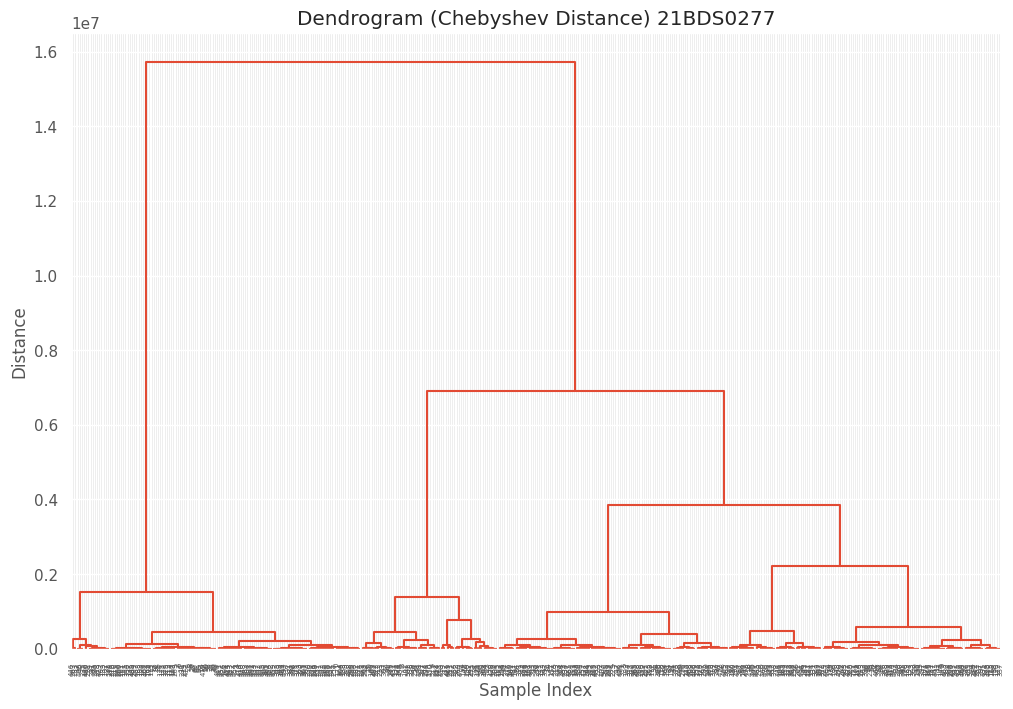

In [133]:
maximum_distances = pdist(dataset, metric='chebyshev')
print("Sample of Chebyshev Distances:\n", maximum_distances[:10])

linked_max = linkage(maximum_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Chebyshev Distance) 21BDS0277')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked_max, color_threshold=0)
plt.show()


### 11.6 Canberra Distance Dendrogram

Sample of Canberra Distances:
 [0.15822531 0.95116986 0.94585007 0.93535136 0.86594244 0.94542976
 0.87857148 0.87494571 0.90955908 0.92470799]


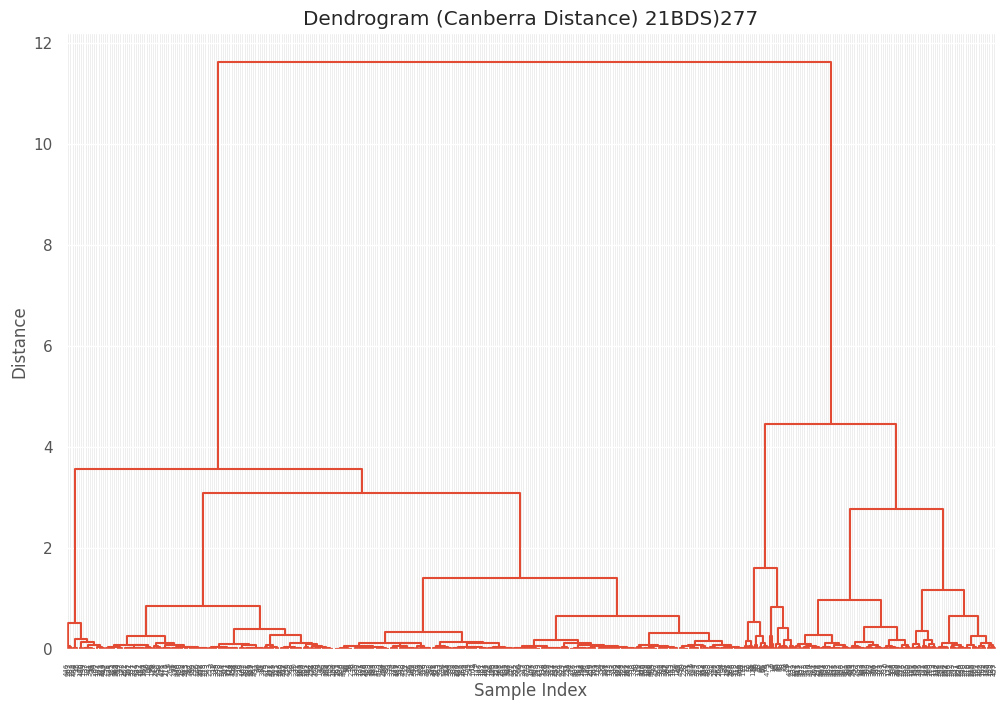

In [132]:
canberra_distances = pdist(dataset, metric='canberra')
print("Sample of Canberra Distances:\n", canberra_distances[:10])

linked_canberra = linkage(canberra_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Canberra Distance) 21BDS0277')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked_canberra, color_threshold=0)
plt.show()


### 11.7 Minkowski Distance Dendrogram (p=3)

Sample of Minkowski Distances (p=3):
 [  24402.00000154   64940.00000022 1484412.00000021 1400633.00000011
  729603.00000032   64252.00002428  808021.00000025   61763.00001301
 1024132.00000029   63771.0000045 ]


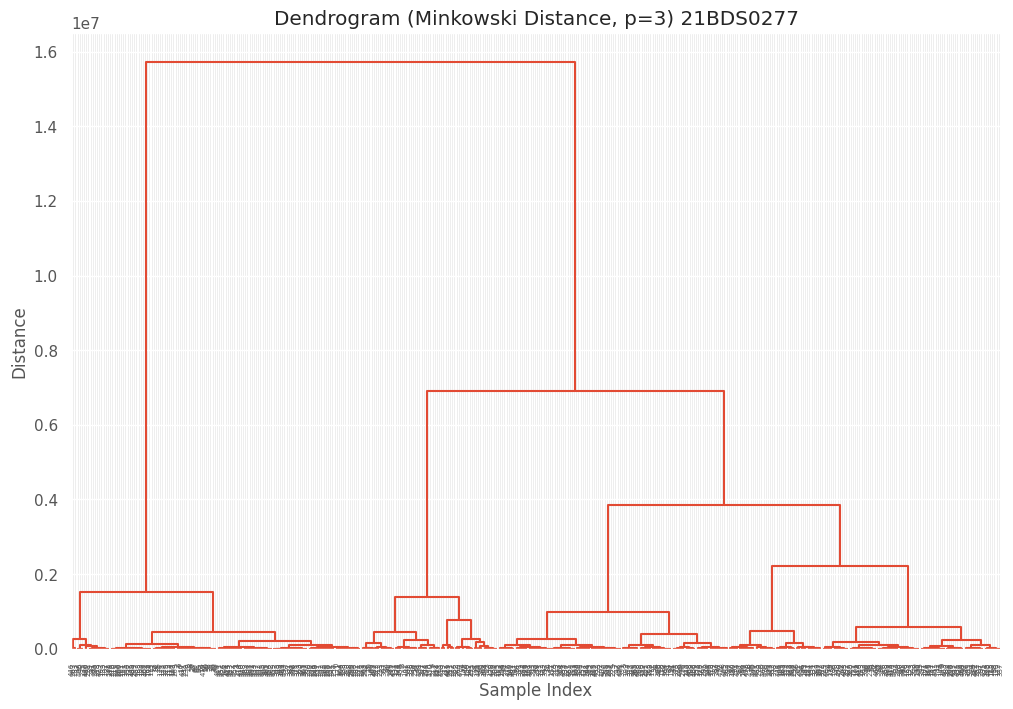

In [131]:
minkowski_distances = pdist(dataset, metric='minkowski', p=3)
print("Sample of Minkowski Distances (p=3):\n", minkowski_distances[:10])

linked_minkowski = linkage(minkowski_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Minkowski Distance, p=3) 21BDS0277')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked_minkowski, color_threshold=0)
plt.show()


# Module 6

## Principle Compenent Analysis

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')
Explained Variance Ratio: [0.73772853 0.26227147]


<ipython-input-109-5de95cbfb8bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Founded'] = pd.to_numeric(numeric_df['Founded'], errors='coerce')
<ipython-input-109-5de95cbfb8bd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.dropna(inplace=True)


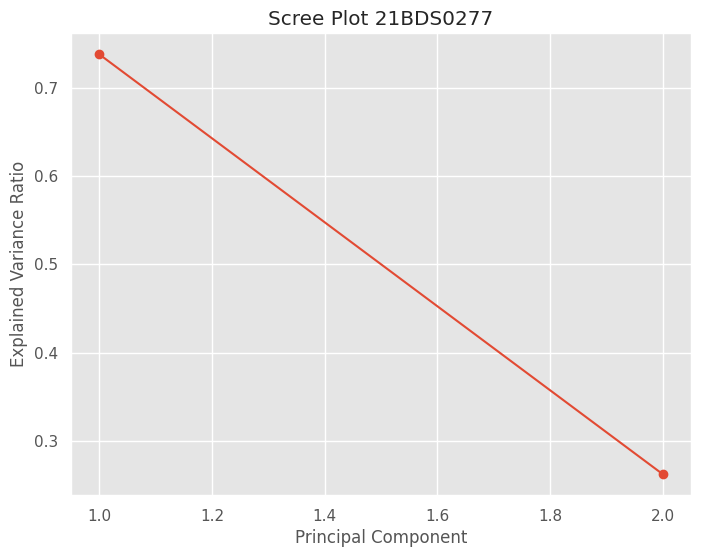

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
url = 'https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx'
df = pd.read_excel(url)

# Check the dataset columns
print(df.columns)

# Step 1: Select only numeric columns for PCA
numeric_df = df[['CIK', 'Founded']]   # Only these two are numeric

# Step 2: Handle non-numeric entries (Founded might have mixed types)
numeric_df['Founded'] = pd.to_numeric(numeric_df['Founded'], errors='coerce')

# Step 3: Drop missing values if any
numeric_df.dropna(inplace=True)

# Step 4: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)

# Step 5: Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Step 6: Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Step 7: Scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title("Scree Plot 21BDS0277")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


### PCA Scatter Plot (PC1 vs PC2)

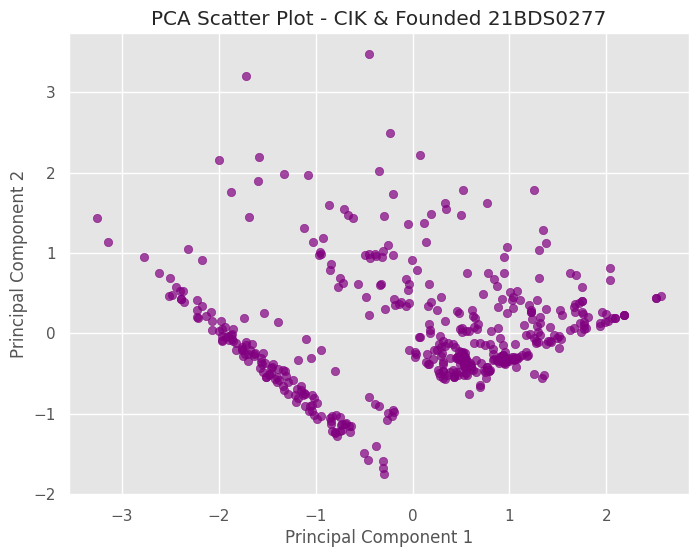

In [130]:
pc_df = pd.DataFrame(pca.transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, color='purple')
plt.title('PCA Scatter Plot - CIK & Founded 21BDS0277')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


### PCA Biplot

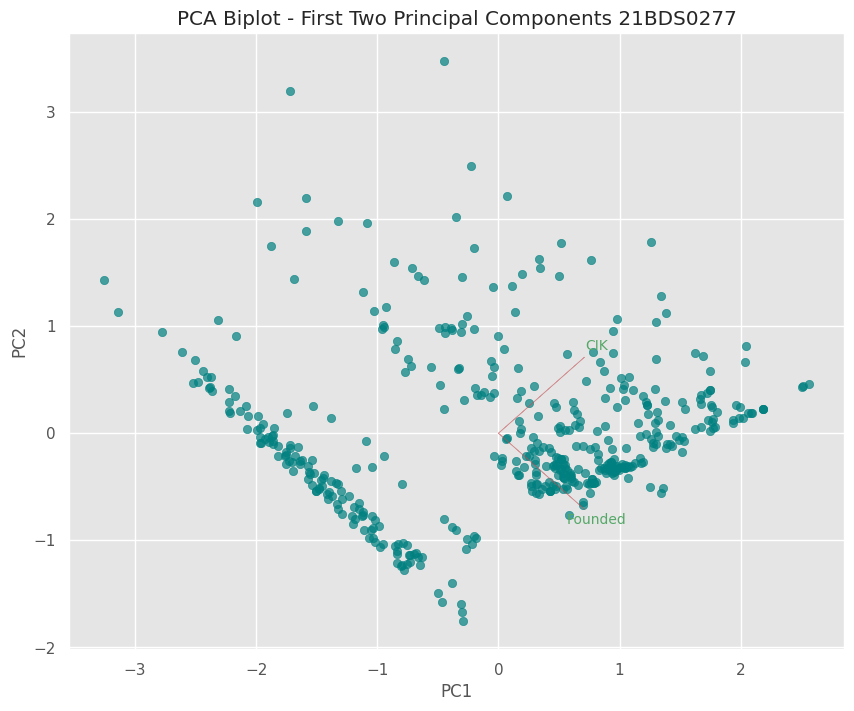

In [129]:
def biplot(score, coeff, labels=None, scale=1):
    xs = score[:,0]
    ys = score[:,1]
    plt.figure(figsize=(10,8))
    plt.scatter(xs, ys, alpha=0.7, color='teal')

    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0, i]*scale, coeff[1, i]*scale, color='r', alpha=0.5)
        plt.text(coeff[0, i]*scale*1.15, coeff[1, i]*scale*1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title('PCA Biplot - First Two Principal Components 21BDS0277')
    plt.show()

biplot(pca.transform(data_scaled), np.transpose(pca.components_), labels=numeric_df.columns)


# Module 7

### Step 1: Load Dataset

In [112]:
import pandas as pd

# Load the dataset from your provided link
url = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
df = pd.read_excel(url)

# Display first few rows
print(df.head())


  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


### Step 2: Data Cleaning and Preprocessing

In [113]:
# Fill missing numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-113-7164fdd288b8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Step 3: Explore Relationships Between Features

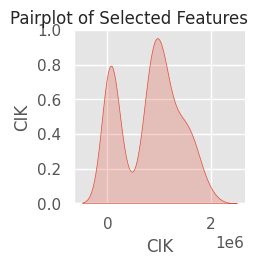

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose two numeric variables for regression (change if you like)
sns.pairplot(df[['Founded', 'CIK']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


### Step 4: Split Dataset into Train and Test Sets

In [115]:
from sklearn.model_selection import train_test_split

# Example:
# Independent variable (X) = CIK
# Dependent variable (y) = Founded

X = df[['CIK']]
y = df['Founded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


### Step 5: Simple Linear Regression

### 5.1 Fit Model

In [120]:
# Independent and Dependent Variables
X = df[['CIK']]
y = df['Founded']  # Now it is numeric

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Linear Regression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)


LinearRegression()

In [121]:
print(f"Coefficient: {reg1.coef_[0]}")
print(f"Intercept: {reg1.intercept_}")


Coefficient: 4.1609552016225584e-05
Intercept: 1922.1760119867797


In [122]:
y_pred = reg1.predict(X_test)


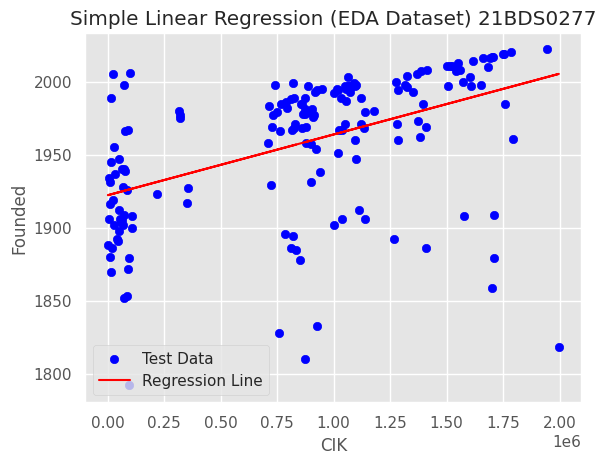

In [124]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("CIK")
plt.ylabel("Founded")
plt.title("Simple Linear Regression (EDA Dataset) 21BDS0277")
plt.legend()
plt.show()


### Step 6: Multiple Linear Regression

In [125]:
# Let's use multiple columns now
X_multi = df[['CIK', 'Founded']]
y_multi = df['Founded']  # Just for example, usually, you would pick a different y

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Predict
y_pred_multi = reg2.predict(X_test_multi)


### Step 7: Residual Analysis

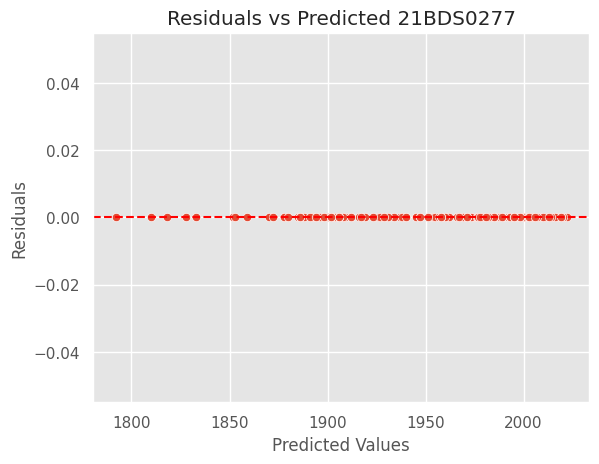

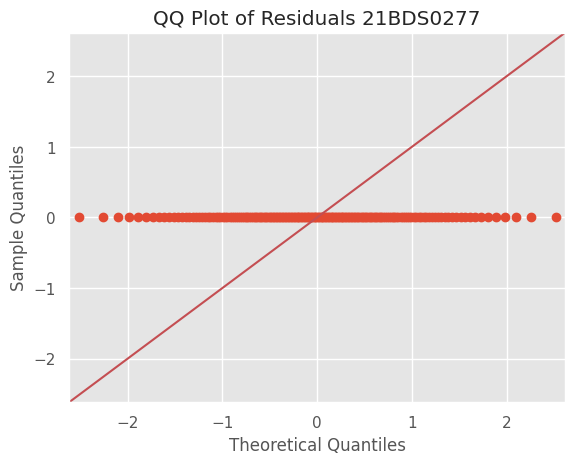

In [128]:
# Calculate residuals
residuals = y_test_multi - y_pred_multi

# Scatter plot residuals
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted 21BDS0277")
plt.show()

# QQ Plot
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals 21BDS0277")
plt.show()
